# Loan Risk Intelligence Analysis

## Steps Taken:
- Import libraries and dataset
- Understanding the data (structure and characteristics)
- Data cleaning
#### EDA
- Univariate Analysis
- Credit Risk Analysis
- Default Analysis by Gender
- Data Preprocessing
- Predictive Analysis (basic logistic regression)

### Importing Libraries and Dataset

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew # for skewness

# for data preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
# Load the dataset
df = pd.read_csv("/content/GermanCredit.csv",index_col=False)
# Show the first ten rows
print("The first 10 rows of the dataset:")
df.head(10)

The first 10 rows of the dataset:


,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,...,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
0,0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,...,67,none,own,2,0,1,2.349340e+09,yes,skilled employee,male
1,1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,...,22,none,own,1,1,1,NaN,yes,skilled employee,female
2,2,NaN,12,critical,education,2096,24.0,5 years,2,single,...,49,none,own,1,0,2,NaN,yes,unskilled resident,male
3,3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,...,45,none,for free,1,0,2,NaN,yes,skilled employee,male
4,4,-23.0,24,delayed,car (new),4870,43.0,3 years,3,single,...,53,none,for free,2,1,2,NaN,yes,skilled employee,male
5,5,NaN,36,repaid,education,9055,NaN,2 years,2,single,...,35,none,for free,1,0,2,2.345788e+09,yes,unskilled resident,male
6,6,NaN,24,repaid,furniture,2835,761.0,11 years,3,single,...,53,none,own,1,0,1,NaN,yes,skilled employee,male
7,7,169.0,36,repaid,car (used),6948,57.0,2 years,2,single,...,35,none,rent,1,0,1,2.349962e+09,yes,mangement self-employed,male
8,8,NaN,12,repaid,radio/tv,3059,18426.0,4 years,2,divorced,...,61,none,own,1,0,1,NaN,yes,unskilled resident,male
9,9,13.0,30,critical,car (new),5234,52.0,NaN,4,married,...,28,none,own,2,1,1,NaN,yes,mangement self-employed,male


In [ ]:
# Show the last five rows using dataframe.head(10) method
print("The last 10 rows of the dataset:")
df.tail(10)

The last 10 rows of the dataset:


,Unnamed: 0,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,...,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
990,990,NaN,12,critical,education,3565,NaN,5 months,2,single,...,37,none,own,2,0,2,NaN,yes,unskilled resident,male
991,991,NaN,15,fully repaid this bank,radio/tv,1569,455.0,9 years,4,single,...,34,bank,own,1,0,2,NaN,yes,unskilled resident,male
992,992,-37.0,18,repaid,radio/tv,1936,NaN,6 years,2,married,...,23,none,rent,2,0,1,NaN,yes,unskilled resident,male
993,993,-18.0,36,repaid,furniture,3959,75.0,NaN,4,single,...,30,none,own,1,0,1,2.349185e+09,yes,mangement self-employed,male
994,994,NaN,12,repaid,car (new),2390,NaN,17 years,4,single,...,50,none,own,1,0,1,2.341832e+09,yes,skilled employee,male
995,995,NaN,12,repaid,furniture,1736,48.0,4 years,3,NaN,...,31,none,own,1,0,1,NaN,yes,unskilled resident,female
996,996,-30.0,30,repaid,car (used),3857,20.0,3 years,4,divorced,...,40,none,own,1,0,1,2.340004e+09,yes,mangement self-employed,male
997,997,NaN,12,repaid,radio/tv,804,44.0,13 years,4,single,...,38,none,own,1,0,1,NaN,yes,skilled employee,male
998,998,-18.0,45,repaid,radio/tv,1845,31.0,2 years,4,single,...,23,none,for free,1,1,1,2.342257e+09,yes,skilled employee,male
999,999,194.0,45,critical,car (used),4576,128.0,NaN,3,single,...,27,none,own,1,0,1,NaN,yes,skilled employee,male


In [ ]:
# Rename the 	"Unnamed: 0" column to Observation_id (unique observation id)
df = df.rename(columns={'Unnamed: 0': 'Observation_id'})

# Verifying the effectiveness of the change
df.head()

,Observation_id,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,...,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job,gender
0,0,-43.0,6,critical,radio/tv,1169,NaN,13 years,4,single,...,67,none,own,2,0,1,2.349340e+09,yes,skilled employee,male
1,1,75.0,48,repaid,radio/tv,5951,89.0,2 years,2,NaN,...,22,none,own,1,1,1,NaN,yes,skilled employee,female
2,2,NaN,12,critical,education,2096,24.0,5 years,2,single,...,49,none,own,1,0,2,NaN,yes,unskilled resident,male
3,3,-32.0,42,repaid,furniture,7882,9.0,5 years,2,single,...,45,none,for free,1,0,2,NaN,yes,skilled employee,male
4,4,-23.0,24,delayed,car (new),4870,43.0,3 years,3,single,...,53,none,for free,2,1,2,NaN,yes,skilled employee,male


## Understanding the data (structure and characteristics)

In [ ]:
# Dimensions of the dataset
df.shape

(1000, 23)

The German credit dataset contains 1000 rows and 23 columns

In [ ]:
# Column names
df.columns

Index(['Observation_id', 'checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount', 'savings_balance',
       'employment_length', 'installment_rate', 'personal_status',
       'other_debtors', 'residence_history', 'property', 'age',
       'installment_plan', 'housing', 'existing_credits', 'default',
       'dependents', 'telephone', 'foreign_worker', 'job', 'gender'],
      dtype='object')

In [ ]:
# dataset summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation_id        1000 non-null   int64  
 1   checking_balance      606 non-null    float64
 2   months_loan_duration  1000 non-null   int64  
 3   credit_history        1000 non-null   object 
 4   purpose               1000 non-null   object 
 5   amount                1000 non-null   int64  
 6   savings_balance       817 non-null    float64
 7   employment_length     938 non-null    object 
 8   installment_rate      1000 non-null   int64  
 9   personal_status       690 non-null    object 
 10  other_debtors         1000 non-null   object 
 11  residence_history     870 non-null    object 
 12  property              1000 non-null   object 
 13  age                   1000 non-null   int64  
 14  installment_plan      1000 non-null   object 
 15  housing               

- **Data size** - 1000 entries
- **Kind of data** - the dataset contains a mix of data types (numeric and categorical dtype)
- **Possible missing values** - checking_balance, savings_balance, employment_length, personal_status, residence_history, and telephone have non-null counts less than the total number of entries. This indicates that there might be missing values in these columns
- **Space data takes** - Memory usage is approximately 179.7+ KB

In [ ]:
# Descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Observation_id,1000.0,4.995000e+02,2.888194e+02,0.000000e+00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
checking_balance,606.0,9.724587e+01,2.069236e+02,-5.000000e+01,-2.300000e+01,2.400000e+01,1.317500e+02,9.990000e+02
months_loan_duration,1000.0,2.090300e+01,1.205881e+01,4.000000e+00,1.200000e+01,1.800000e+01,2.400000e+01,7.200000e+01
amount,1000.0,3.271258e+03,2.822737e+03,2.500000e+02,1.365500e+03,2.319500e+03,3.972250e+03,1.842400e+04
savings_balance,817.0,7.815704e+02,3.016984e+03,0.000000e+00,3.100000e+01,6.400000e+01,1.280000e+02,1.997200e+04
installment_rate,1000.0,2.973000e+00,1.118715e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00
age,1000.0,3.554600e+01,1.137547e+01,1.900000e+01,2.700000e+01,3.300000e+01,4.200000e+01,7.500000e+01
existing_credits,1000.0,1.407000e+00,5.776545e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00
default,1000.0,3.000000e-01,4.584869e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
dependents,1000.0,1.155000e+00,3.620858e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


This method provides the summary statistics, excluding the null values. It shows the statistical summary of all numeric-typed(int, float) columns. For example, the attribute "amount" has 1000 count, the mean value of this column is 3.271258e+03, the standard deviation is 2.822737e+03, the minimum value is 2.500000e+02, 25th percentile is 1.365500e+03, 50th percentile is 2.319500e+03, 70th percentile is	3.972250e+03 and the maximum value is 1.842400e+04.

In [ ]:
# Summary statistics for categorical columns
print(df.describe(include="object").T)

                  count unique               top freq
credit_history     1000      5            repaid  530
purpose            1000     10          radio/tv  280
employment_length   938     31           1 years  122
personal_status     690      3            single  548
other_debtors      1000      3              none  907
residence_history   870     36           2 years   43
property           1000      4             other  332
installment_plan   1000      3              none  814
housing            1000      3               own  713
foreign_worker     1000      2               yes  963
job                1000      4  skilled employee  630
gender             1000      2              male  690


## Data Cleaning
- Handle missing values
- Handle duplicates
- Checking and handling outliers
- Correct data formatting


### Checking for missing data

In [ ]:
# Check for missing values
df_missing = df.isnull().sum()
print(f"\nNumber of missing rows in the column is:")
print(f"\n{df_missing}")



Number of missing rows in the column is:

Observation_id            0
checking_balance        394
months_loan_duration      0
credit_history            0
purpose                   0
amount                    0
savings_balance         183
employment_length        62
installment_rate          0
personal_status         310
other_debtors             0
residence_history       130
property                  0
age                       0
installment_plan          0
housing                   0
existing_credits          0
default                   0
dependents                0
telephone               596
foreign_worker            0
job                       0
gender                    0
dtype: int64


checking_balance have 394 missing values, savings_balance - 183, employment_length - 62, personal_status - 310, residence_history - 130, and telephone 596 missing values.

In [ ]:
# Calculate percentage of missing value in the df
missing_percentages = (df_missing / len(df)) * 100

# Print summary of missing values for each column
for col in df.columns:
  # Checking the missing values and their percentages
  if df_missing[col] > 0: # 0 rep true
    print(f"{col} has {df_missing[col]} missing values ({missing_percentages[col]:.2f}%)")

checking_balance has 394 missing values (39.40%)
savings_balance has 183 missing values (18.30%)
employment_length has 62 missing values (6.20%)
personal_status has 310 missing values (31.00%)
residence_history has 130 missing values (13.00%)
telephone has 596 missing values (59.60%)


Handling of missing values will be addressed in subsequent steps

### Checking for duplicates

In [ ]:
# Identify rows with duplicate values across all columns in df
df.duplicated().any()

False

There are no duplicate entries in the dataset

### Handling Missing Values
Columns with missing values are:
- checking_balance
- savings_balance
- employment_length
- personal_status
- residence_history
- telephone


Telephone numbers are not crucial for credit risk analysis; thus, missing values will be replaced with NaN

In [ ]:
# checking Datatype of incomplete features
df[["employment_length", "personal_status", "residence_history", "checking_balance", "savings_balance"]].dtypes

,0
employment_length,object
personal_status,object
residence_history,object
checking_balance,float64
savings_balance,float64


Datatype identification is a critical step in selecting the appropriate method for addressing missing values. employment_length, personal_status, residence_history are categorical, while checking_balance, savings_balance are numerical


### Employment length, Personal status, Residence history

In [ ]:
object_cols= ["employment_length", "personal_status", "residence_history"]
for col in object_cols:
    df[col].fillna("Unknown", inplace=True)

<ipython-input-14-4927bce1c978>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


Note: In order to maintain data accuracy and avoid potential biases, missing categorical values in the credit risk dataset are filled with 'Unknown'. This designation indicates that the information is not available, preventing assumptions about borrower characteristics and ensuring a reliable credit risk assessment. But doing further analysis in subsequent steps (Logistic regression) we will do a categorical encoding in other to treat the "unknown" as a seperate category. But for the purpose of a basi EDA we would leave it flagged "Unknown".

In [ ]:
# Verify update
df[["employment_length", "personal_status", "residence_history"]].isna().value_counts()

,,,count
employment_length,personal_status,residence_history,
False,False,False,1000


All missing values in the categorical columns have been successfully filled

### Checking balance, Savings balance

Missing values in the numerical columns, specifically "Checking Balance" and "Savings Balance", require careful handling. Since these columns represent financial balances. These values cannot be flagged as "Unknown" (due to the numerical data type) or set to zero (0), as this may misrepresent the customer's financial standing. Instead, a considered imputation strategy is required to accurately capture financial balances and inform credit risk evaluations.


Checking Balance

In [ ]:
df[["checking_balance", "savings_balance"]].isna().value_counts()

checking_balance  savings_balance
False             False              522
True              False              295
                  True                99
False             True                84
Name: count, dtype: int64

The above query reveals:

- 522 unique observations (observation_id) have complete data for both Checking Balance and Savings Balance (no missing values).
- 295 rows have missing Checking Balance, but Savings Balance is reported.
- 99 unique observations within the dataset lack information for both checking and savings balances.
- 84 rows have reported Checking Balance, but Savings Balance is missing.


In [ ]:
# To further confirm the above information.
# Filter rows where both columns are null
null_rows = df[(df['checking_balance'].isnull()) & (df['savings_balance'].isnull())]

print(f"Rows where both are both missing:",(len(null_rows)))

not_missing = df[(df['checking_balance'].notna()) & (df['savings_balance'].notna())]

print(f"Rows where both are filled:",(len(not_missing)))

Rows where both are both missing: 99
Rows where both are filled: 522


So to address the issue of numerical missing values we approach it in either of the two ways;
1. Median Imputation: If the data is skewed or has outliers, median imputation might be a better choice.
2. Mean Imputation: If the data is normally distributed
3. Regression Imputation: If there are strong correlations between the missing values and other columns, regression imputation could be effective.

Dropping missing values is not a viable option, as it risks omitting essential information and distorting analytical findings. And in other to preserve data integrity and ensure accurate analysis, missing values must be addressed through alternative methods rather than deletion, as this is a sensitive data.

### steps taken before filling up missing data
- Check if the data is skewed or has outliers
- check if there are strong correlations
This will deteremine our approach

In [ ]:
# Calculate skewness for only missing data in the columns of interest
balance_col = ["checking_balance", "savings_balance"]

skew_values = {col: skew(df[col].dropna()) for col in balance_col}
# print answer
print("Skewness values of checking balance and savings balance:")
print(skew_values)

Skewness values of checking balance and savings balance:
{'checking_balance': 2.6236528890516095, 'savings_balance': 5.066884361244304}


Note:  A skewness value below -1 or above 1 indicates high skew.
In this case both features (checking balance and savings balance) are high skewed.

#### Checking for correlation.
- This is to observe if there are any association among the variables.

In [ ]:
# Check correlation matrix for numeric columns
correlation_matrix = df[["checking_balance", "savings_balance", "months_loan_duration",
                         "amount", "installment_rate", "age", "existing_credits", "dependents"]].corr()

# print correlations involving "checking_balance" and "savings_balance"
print("Checking_balance:")
print(correlation_matrix["checking_balance"].sort_values(ascending=False))

print("\nSavings_balance:")
print(correlation_matrix["savings_balance"].sort_values(ascending=False))


Checking_balance:
checking_balance        1.000000
savings_balance         0.048397
age                     0.036593
existing_credits       -0.037061
installment_rate       -0.045555
dependents             -0.069831
amount                 -0.090940
months_loan_duration   -0.096287
Name: checking_balance, dtype: float64

Savings_balance:
savings_balance         1.000000
checking_balance        0.048397
existing_credits        0.038940
age                     0.017917
installment_rate        0.015506
dependents              0.006317
amount                 -0.034654
months_loan_duration   -0.041422
Name: savings_balance, dtype: float64


A very weak positive correlation exists between the savings and checking balance,and the have limited predictive power for other variables (in this case numerical). The weak association suggest that customers with higher checking balances tend to have slightly higher savings balances. In subsequent steps, when doing a more complex analysis, we will encode the other categorical variables to check for corelation.

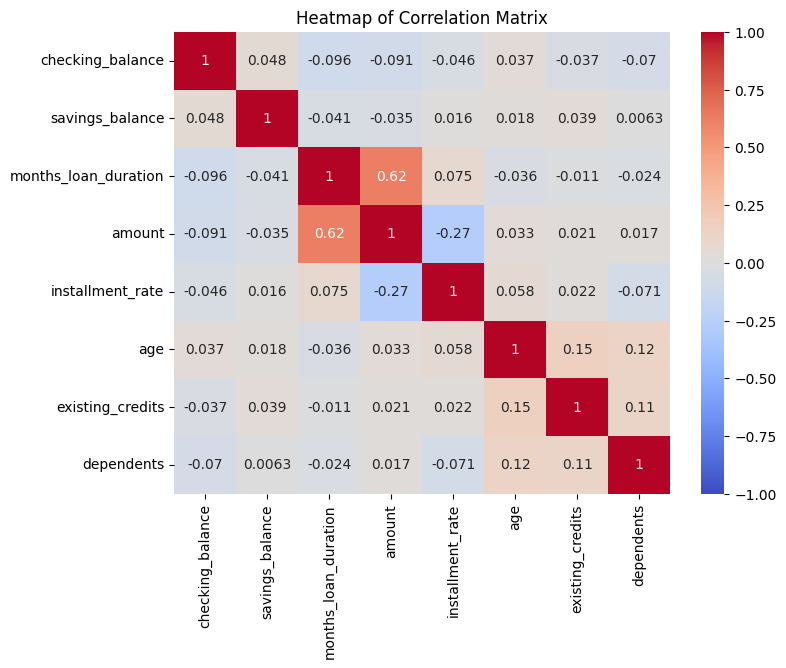

In [ ]:
# correlation plot using heatmap to display this result
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Heatmap of Correlation Matrix")
plt.show()

- This further confirms weak association, so we cannot use the regression imputaion approach (utilizing any of the machine learning techniques) because of weak correlation, and presence of skewness. Rather median imputation would be suitable for handlng the missing values in this dataset.
- Median is less sensitive to outliers and also will help preserve the original distribution of the data (specifically the skewed distribution)


In [ ]:
# Import SimpleImputer for imputaion purposes
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy="median")

#Imputation for savings balance feature
df["savings_balance"] = median_imputer.fit_transform(df[["savings_balance"]])

#Imputation for checking balance feature
df['checking_balance'] = median_imputer.fit_transform(df[["checking_balance"]])

In [ ]:
# Verifying if there are still missing values
df[[ "savings_balance", "checking_balance"]].isna().sum()

,0
savings_balance,0
checking_balance,0


There are no null values in the Savings balance and checking balance feature, they both have been addressed

### Handling Outliers in the entire dataset features
- We will first identify and address any outliers present in the dataset. outliers in a dataset can be identified using any statistical method (z-score, IQR, box plot amongst others) and when present they can be either removed or transformed.

In [ ]:
# viewing the numerical features for the purpose of outlier identification
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns
print(numerical_columns)


Index(['Observation_id', 'checking_balance', 'months_loan_duration', 'amount',
       'savings_balance', 'installment_rate', 'age', 'existing_credits',
       'default', 'dependents', 'telephone'],
      dtype='object')


In [ ]:
# numerical columns, excluding "telephone"
numerical_df = df.select_dtypes(include=["float64", "int64"]).drop(columns=["telephone"], errors="ignore")

# Dict storing outliers for each numerical column
outliers = {}

# Looping to calculate IQR and identify outliers
for column in numerical_df.columns:
    Q1 = numerical_df[column].quantile(0.25)
    Q3 = numerical_df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds (at the 25th and 75th percentile)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers[column] = df[(numerical_df[column] < lower_bound) | (numerical_df[column] > upper_bound)]

    # Print the outliers for each column
    print(f"Outliers for {column}:\n", outliers[column])


Outliers for Observation_id:
 Empty DataFrame
Columns: [Observation_id, checking_balance, months_loan_duration, credit_history, purpose, amount, savings_balance, employment_length, installment_rate, personal_status, other_debtors, residence_history, property, age, installment_plan, housing, existing_credits, default, dependents, telephone, foreign_worker, job, gender]
Index: []

[0 rows x 23 columns]
Outliers for checking_balance:
      Observation_id  checking_balance  months_loan_duration  \
27               27             979.0                    12   
30               30             191.0                    18   
34               34             837.0                    12   
37               37             884.0                    18   
38               38             646.0                    10   
..              ...               ...                   ...   
975             975             661.0                    24   
980             980             185.0                    30 

Visualizing these outliers using the box plot

Plotting checking_balance...


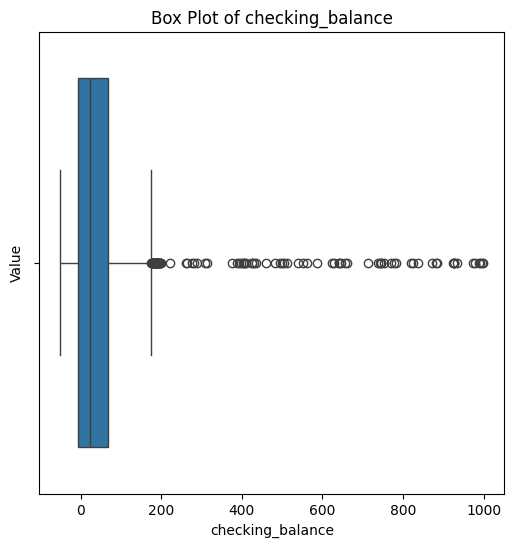

Plotting months_loan_duration...


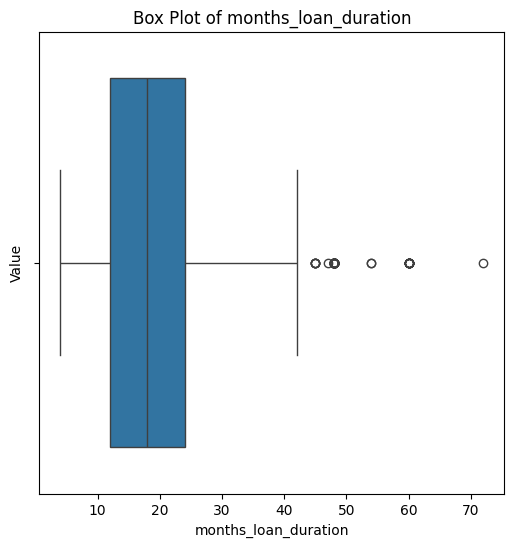

Plotting amount...


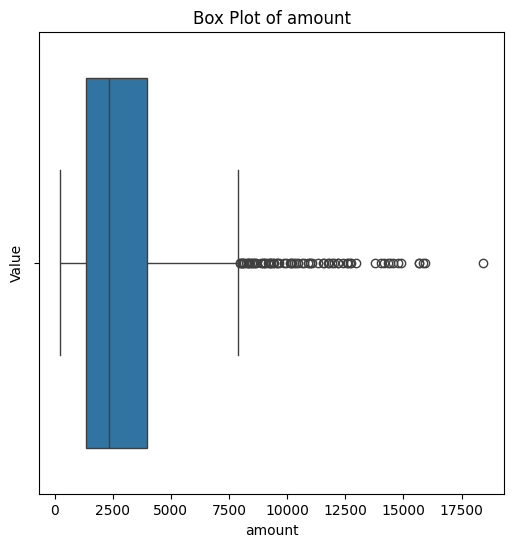

Plotting savings_balance...


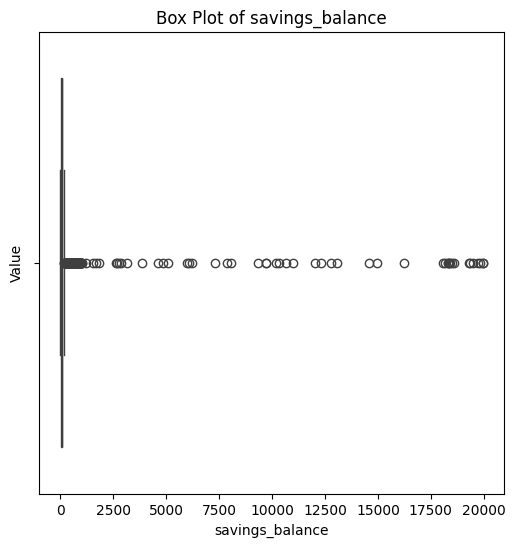

Plotting installment_rate...


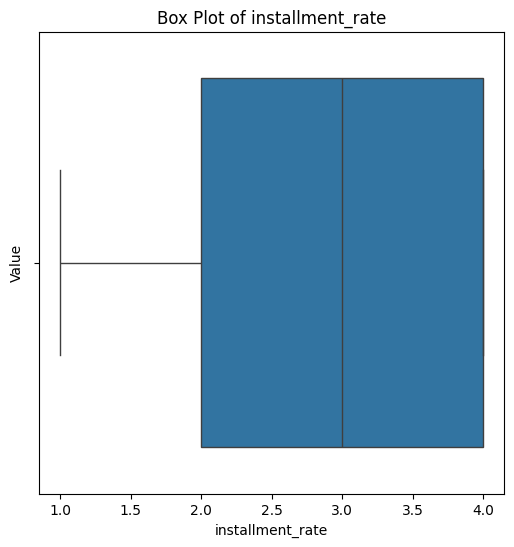

Plotting age...


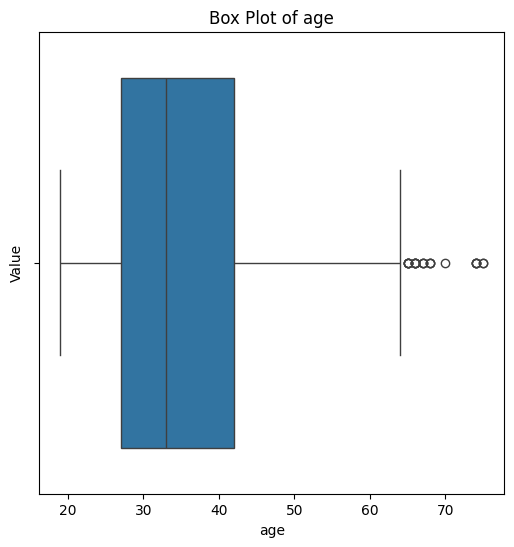

Plotting existing_credits...


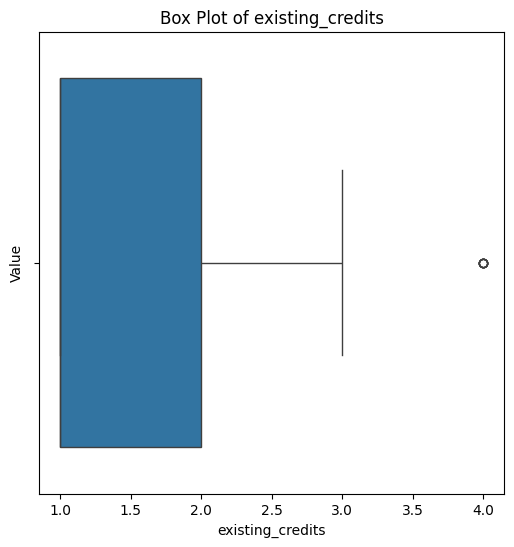

Plotting dependents...


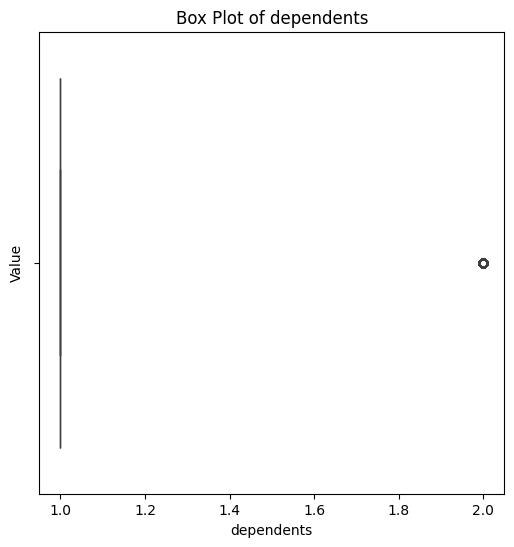

In [ ]:
# identify outliers using boxplot
def plot_outliers(col):
  """
  This function makes a boxplot of
  the numerical cols (with the exception of telephone feature), to identify outliers
  """

  plt.figure(figsize=(6, 6))
  sns.boxplot(x = df[col])
  plt.title(f"Box Plot of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Value")
  plt.show()

# numerical columns excluding "telephone"
colum = ["checking_balance", "months_loan_duration", "amount", "savings_balance",
         "installment_rate", "age", "existing_credits", "dependents"]

 # Loop through the columns
for col in colum:
  print(f"Plotting {col}...")
  plot_outliers(col);


Based on the above box plots, it can be observed that the numerical variables exhibit outliers:

1. checking_balance: A significant number of outliers at the higher end, indicating a few individuals with much higher checking balances.
2. months_loan_duration: A few outliers at the higher end, indicating longer loan durations.
3. amount: Numerous outliers at the higher end, indicating significantly larger loan amounts.
4. savings_balance: Many outliers at the higher end, suggesting individuals
with substantial savings.
5. installment_rate: There are a few outliers at the lower end of the distribution, suggesting some individuals with very low installment rates.
6. age: A few outliers at the higher end, indicating older individuals.
7. existing_credits: A single outlier at the higher end, suggesting an individual with a large number of existing credits.
8. dependents: A single outlier at the higher end, indicating an individual  with a high number of dependents.

#### Handling the Outliers

- In this case of credit risk analysis (it is necessary to consider the domain knowledge), these outliers may be geniue (genuine outliers) because it may represent legitimate extreme cases, such as individuals with exceptional financial circumstances or unique financial situations. It is generally best to keep them in the dataset. These outliers can provide valuable insights into the tails of the distribution and potentially improve the model's ability (in the case of model building) to predict rare events.

- Another option may be capping, trimming, or winsorizing them. However, it can lead to over-processing of the data and lose valuable information or misleading information.

- In summary, we leave them (the outliers), as they can provide insight to the data.


#### Feature Engineering
Deriving new features that might be useful for the analysis.
We will categorize;
- months_loan_duration into three categories of short term duration, medium term duration, long term duration. When this is analyzed with default, it will give an insight on how loan duration influences default rates.


In [ ]:
# months_loan_duration info
df["months_loan_duration"].describe()

,months_loan_duration
count,1000.000000
mean,20.903000
std,12.058814
min,4.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,72.000000


The minimum loan duration is 4 months (<1 year) and the maximum is 72 months (6 years). So we categorize it as follows;
0 - 12 months = short term loan duration, 13 - 32 months = medium term duration, and above 33 months = long term duration

In [ ]:
# loan duration Category
df["loan_duration_category"] = pd.cut(df["months_loan_duration"], bins=[0, 12, 36, 100],
                                      labels=["short term loan duration","medium term loan duration", "long term loan duration"])

In [ ]:
# Checking if the changes had the desired impact
df["loan_duration_category"].sample(10)

,loan_duration_category
377,short term loan duration
32,medium term loan duration
183,medium term loan duration
967,medium term loan duration
758,medium term loan duration
773,medium term loan duration
224,medium term loan duration
879,medium term loan duration
301,medium term loan duration
66,short term loan duration


### Exploratory Data Analysis (EDA)

### Univariate Analysis

Here we focus on key features that are likely to provide valuable insight to the dataset.

This analysis will be subdivided into
- Univariate analysis for numerical features
- Univariate analysis for categorical features

#### Numerical Univariate Analysis
The very significant features of interest are:
- Tareget variabe is the default feature
- checking_balance, months_loan_duration, amount, savings_balance,installment_rate, age, existing_credits, default, dependents.
There is no need for individual description of the numerical features (using the desc()), as this has been done earlier.



#### Default Feature - Indicates that 0 is a good loan, 1 is a defaulting one

In [ ]:
# Summary statistics
df["default"].describe()

,default
count,1000.000000
mean,0.300000
std,0.458487
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
# Group and count the default feature
default_group = df.groupby("default").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
default_group

,default,counts
0,0,700
1,1,300


The default feature distribution reveals that the majority of defaulting loans (700), while only 300 are observed to be good loans. To gain a more intuitive understanding of this distribution, we will create a visual representation, allowing us to better comprehend the concentration of defaults and identify patterns or trends.

Text(0.5, 1.05, 'Distribution of default rate')

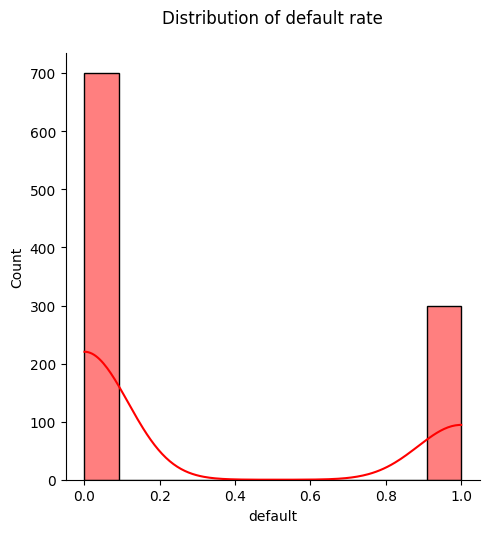

In [ ]:
# View the distribution of the default (target) column

sns.displot(df["default"], color="red", kde=True);

plt.title("Distribution of default rate", y = 1.05)

#### checking_balance, months_loan_duration, amount, savings_balance,installment_rate, age, existing_credits, dependents

In [ ]:
# Group and count the existing credits
credit_group = df.groupby("existing_credits").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
credit_group

,existing_credits,counts
0,1,633
1,2,333
2,3,28
3,4,6


In summary, 633 individual applicants have 1 existing credit, 333 individual applicants have 2, 28 applicants have 3, and 6 have 4 existing credits.

In [ ]:
# Group and count the dependents
depend_group = df.groupby("dependents").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
depend_group

,dependents,counts
0,1,845
1,2,155


Individual applicants with only one dependents are 845, while 155 individual applicants have 2 dependents. Further analysis will provide insight into the relationship between the number of dependents and default rates, aiming to determine whether: Individuals with single dependents or those with multiple dependents (two or more), differ significantly in their likelihood of defaulting on loans.


In [ ]:
# Group and count the installment rate
install_group = df.groupby("installment_rate").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
install_group


,installment_rate,counts
3,4,476
1,2,231
2,3,157
0,1,136


This shows the installment rate distribution. Breakdown by installment rate is as follows: 476 borrowers (47.6%) have 4 installments, 231 borrowers (23.1%) have 2 installments, 157 borrowers (15.7%) have 3 installments, and 136 borrowers (13.6%) have 1 installment.


In [ ]:
# Group and count the savings_balance
saving_group = df.groupby("savings_balance").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
saving_group.head(10)


,savings_balance,counts
64,64.0,190
89,89.0,14
30,30.0,12
13,13.0,12
80,80.0,11
5,5.0,11
57,57.0,11
35,35.0,10
4,4.0,10
19,19.0,9


- Month loan duration : This  will help in giving insight into the length of the loan repayment period, which can affect the total interest paid and the borrower's financial commitment over time.
- Amount: Analyzing this is crucial as larger loan amounts might indicate higher risk.
- Installment rate: This can help to assess affordability, as it reflects the portion of income used to pay off the loan.
- Age: This can help indicate the age bracket of most borrowers and also to see if age can influence credit risk/default
- Existing credit: The number of existing credits can indicate a borrower’s overall debt level.
-Dependents: Helps to analyze the financial obligations of the borrower as more dependents might suggest higher financial obligations
- Income indicators(Savings balance and checking balance): provide insights into a borrower's financial health.

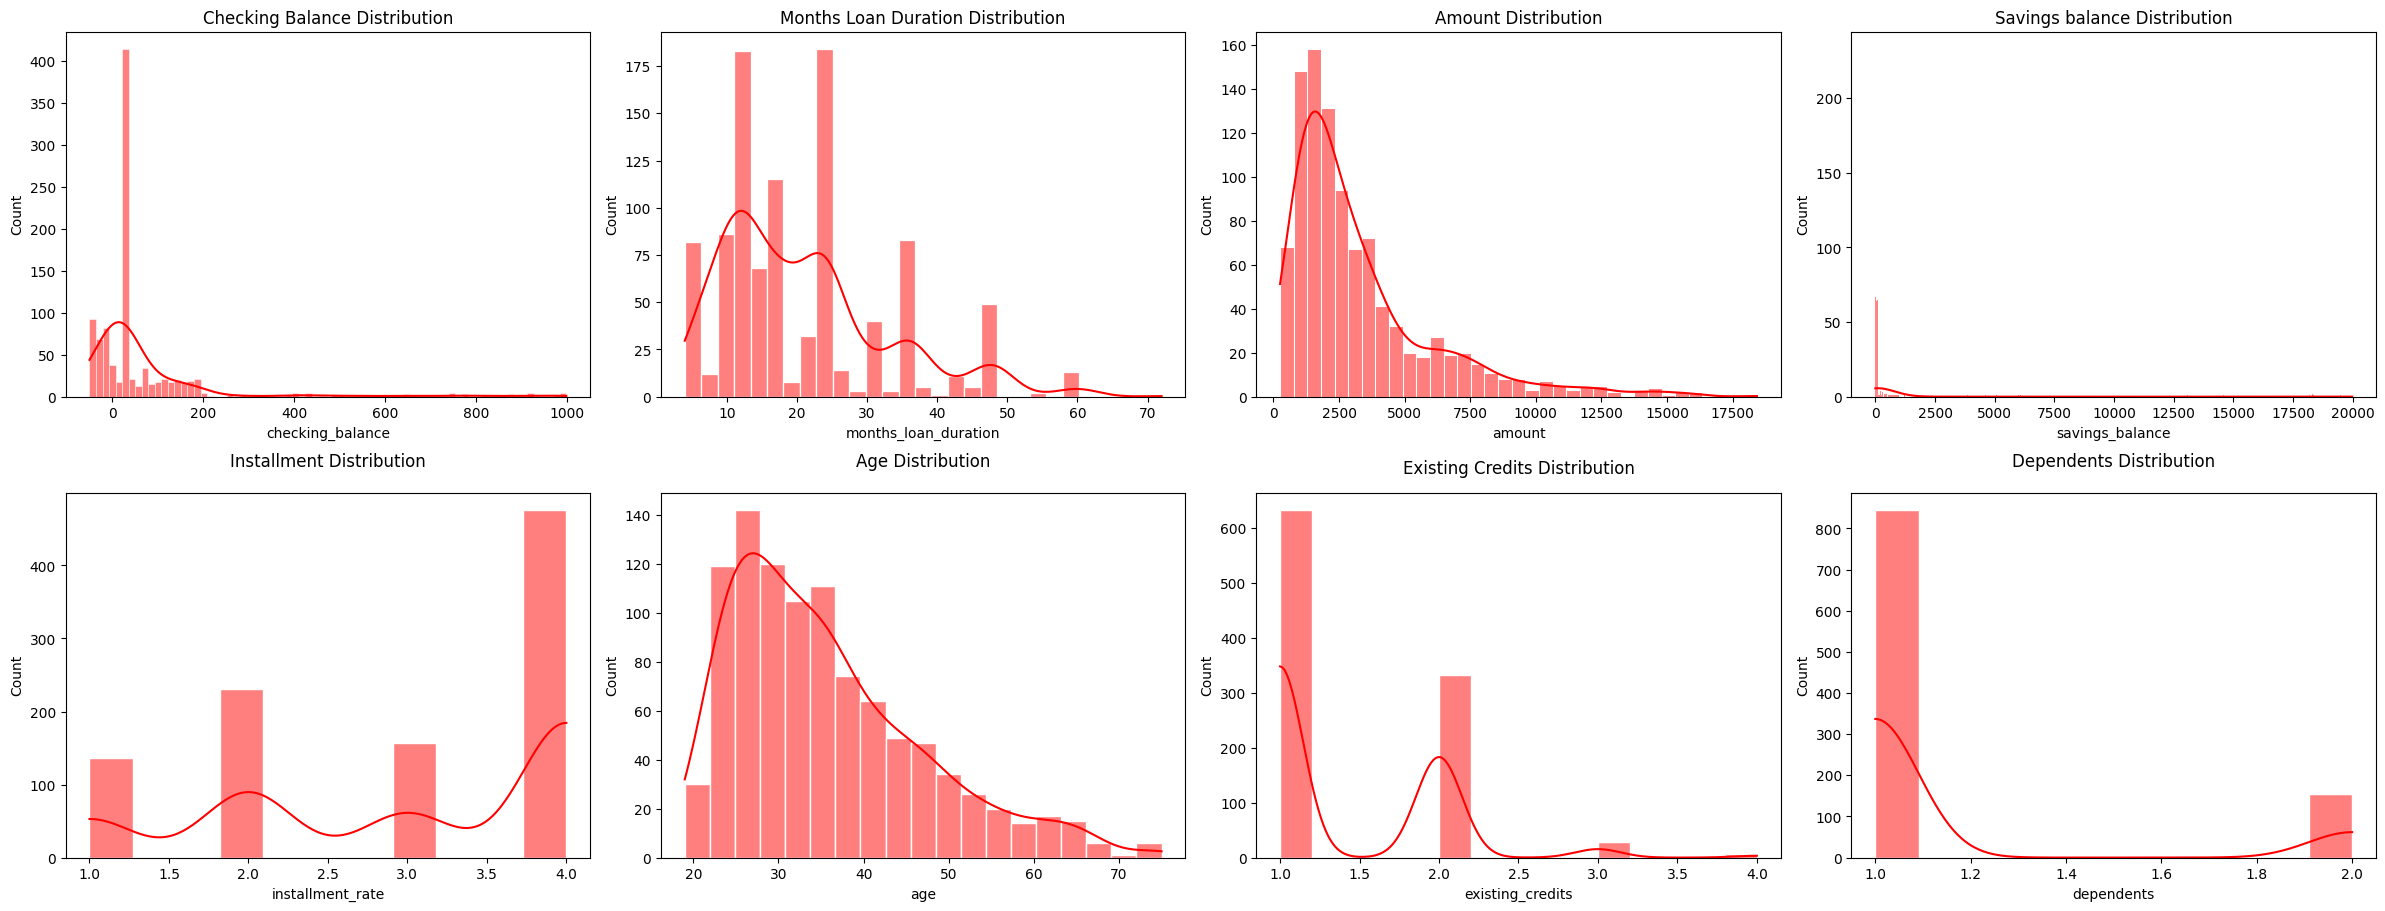

In [ ]:
plt.figure(figsize=(24, 18))

# Plotting histograms using sns.histplot
plt.subplot(4, 4, 1)
sns.histplot(df["checking_balance"], color="red", edgecolor="white", kde=True)
plt.title("Checking Balance Distribution")

plt.subplot(4, 4, 2)
sns.histplot(df["months_loan_duration"], color="red", edgecolor="white", kde=True)
plt.title("Months Loan Duration Distribution")

plt.subplot(4, 4, 3)
sns.histplot(df["amount"], color="red", edgecolor="white", kde=True)
plt.title("Amount Distribution")

plt.subplot(4, 4, 4)
sns.histplot(df["savings_balance"], color="red", edgecolor="white", kde=True)
plt.title("Savings balance Distribution")

plt.subplot(4, 4, 5)
sns.histplot(df["installment_rate"], color="red", edgecolor="white", kde=True)
plt.title("Installment Distribution",y=1.05)

plt.subplot(4, 4, 6)
sns.histplot(df["age"], color="red", edgecolor="white", kde=True)
plt.title("Age Distribution",y=1.05)

plt.subplot(4, 4, 7)
sns.histplot(df["existing_credits"], color="red", edgecolor="white", kde=True)
plt.title("Existing Credits Distribution",y=1.03)

plt.subplot(4, 4, 8)
sns.histplot(df["dependents"], color="red", edgecolor="white", kde=True)
plt.title("Dependents Distribution",y=1.05)

plt.tight_layout()
plt.show()


Observations from the above plots:
1. checking balance:  Most people have lower checking balances, with extremly few having higher balances. People with higher balances generally indicates individuals with financial struggles and increased risk of default (due to their outstanding loan balance).

2. Month loan duration: The loan duration varies. It indicates the timeframe over which a loan needs to be repaid. Most of the loans have shorter durations, with a few longer-term loans. Well to understand this better, we will plot the loan duration category, and also analyse loan duration by the proportion of default.

3. Amount: This reveals the amount of money an individual applicant applicant request as a loan. Higher loan amounts naturally translate to higher risk for the lender. Most loan have smaller amounts compared to the few larger loans.

4. Savings balance: This is the balance in the applicant’s savings account, and used as a measure of financial stability. Most individual applicants have lower savings balances, with a very few having higher savings. Lower savings balance suggest weaker financial position and increased financial risk.

5. Installment rates: This rate varies across the plot. But most are concentrated around 4 and 2. This suggests that a significant portion of borrowers are dedicating a larger percentage of their income to repay the loan, which can imply greater financial strain. Borrowers with installment rates of 4 might be more susceptible to default if their disposable income decreases (e.g., due to job loss or unexpected circumstances/expenses).

6. Age: This reveals the age distribution and will aid in assessing risk tolerance and repayment potential. Most individuals are younger, with a few older individuals.

7. Existing Credit: Most individuals have fewer existing credits, with a few having more. Those with 1 existing risk are less risky, as these borrowers are managing fewer concurrent loans and may be better positioned to fulfill repayment obligations. While higher number of existing credits (3 or 4):have potentially higher risk due to a heavier debt load, which could impact their ability to make timely payments on each loan.

8. Dependents: Most individuals have fewer dependents, which may suggest a lower risk of default (due to lower household financial strain).

#### Univariate analysis for categorical features
- This gives insight into the categorical features
- Features include: credit_history, purpose, employment_length, personal_status,other_debtors, residence_history, property, installment_plan, housing,foreign_worker, job, gender.

In [ ]:
# Group and count the credit_history
credit_group = df.groupby("credit_history").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
credit_group

,credit_history,counts
4,repaid,530
0,critical,293
1,delayed,88
3,fully repaid this bank,49
2,fully repaid,40


Over half of the borrowers (530) have a record of having repaid loans, which is a positive indicator of their creditworthiness and reduces their perceived credit risk. 293 borrowers have had a critical credit history, which could indicate a higher likelihood of default or financial instability. Borrowers with a history of delayed payments(88), although represent a smaller portion may also have a higher risk of default. Borrowers with who have fully repaid loans indicate lower credit risk individuals.

In [ ]:
# Group and count the purpose
purpose_group = df.groupby("purpose").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
purpose_group

,purpose,counts
7,radio/tv,280
1,car (new),234
5,furniture,181
2,car (used),103
0,business,97
4,education,50
8,repairs,22
3,domestic appliances,12
6,others,12
9,retraining,9


This reveals the diverse financal goals among borrowers.
The majority of loans taken are for;
- Radio/TV (280), Car (New) (234), and Furniture (181), Car (Used) (103), indicating a trend towards financing lifestyle or household enhancements. Loans for these purposes can be more vulnerable to default in economic downturns, as they are not directly income-generating.
97 borrowers took loans for business purposes and this indicate potential income-generating activities, which can enhance their ability to repay, reducing their default rate. 50 borrowers took loan for education purposes. This is typically an investment in the borrower’s future, often associated with long-term stability. Repairs (22), Domestic Appliances (12), Others (12), Retraining (9) are smaller categories, indicating possibly urgent or discretionary needs among borrowers.

In [ ]:
# Group and count the personal status
personal_group = df.groupby("personal_status").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
personal_group

,personal_status,counts
3,single,548
0,Unknown,310
2,married,92
1,divorced,50


A large majority of borrowers are single Single (548), next is married (92) and then divorced(50)

In [ ]:
# Group and count the residence history
residence_group = df.groupby("residence_history").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
residence_group

,residence_history,counts
36,Unknown,130
16,2 years,43
32,8 months,38
2,1 years,37
23,3 years,36
0,0 months,34
25,4 years,33
34,9 months,29
1,1 months,28
4,10 years,27


Residence history may reveal the different levels of stability among borrowers. As observed in the above table, this varies among borrowers.

In [ ]:
# Group and count the job
job_group = df.groupby("job").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
job_group

,job,counts
1,skilled employee,630
3,unskilled resident,200
0,mangement self-employed,148
2,unemployed non-resident,22


Greater part of the borrowers (630) are skilled employees, 200 are unskilled resident, 148 self employed, 22 are unemployed non-resident.

In [ ]:
# Group and count the property
property_group = df.groupby("property").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
property_group

,property,counts
1,other,332
2,real estate,282
0,building society savings,232
3,unknown/none,154


In [ ]:
# Group and count the installment plan
installments_group = df.groupby("installment_plan").size().reset_index(name="counts").sort_values(by ="counts", ascending = False)
# Print
installments_group

,installment_plan,counts
1,none,814
0,bank,139
2,stores,47


Visualizing the distribution of catagorical type data in the dataset

<ipython-input-44-2958947c6129>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,order=sorted_categories, palette="plasma")
<ipython-input-44-2958947c6129>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,order=sorted_categories, palette="plasma")
<ipython-input-44-2958947c6129>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df,order=sorted_categories, palette="plasma")
<ipython-input-44-2958947c6129>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

<Figure size 640x480 with 0 Axes>

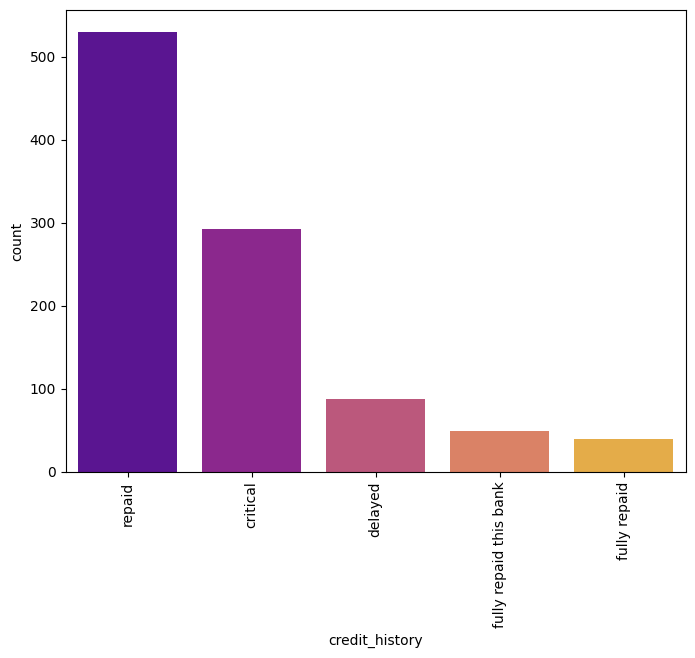

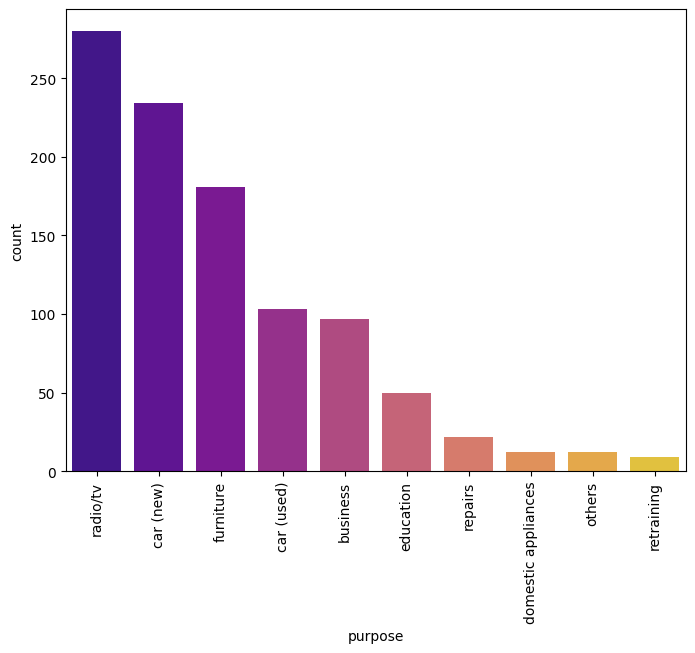

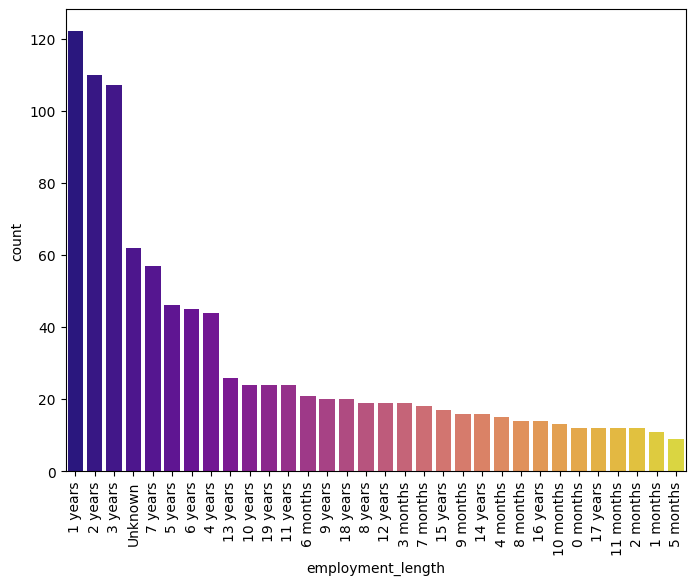

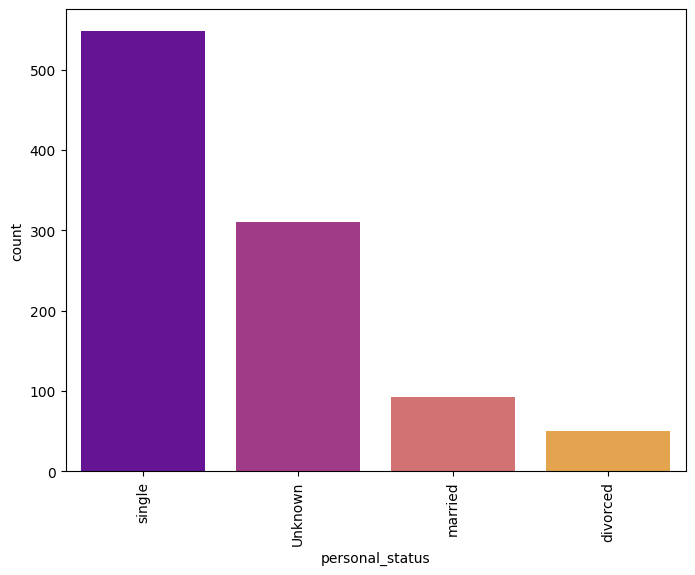

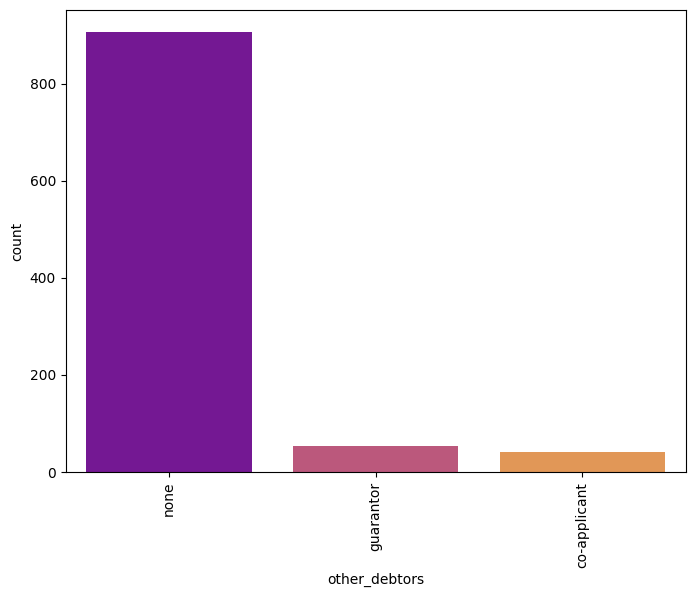

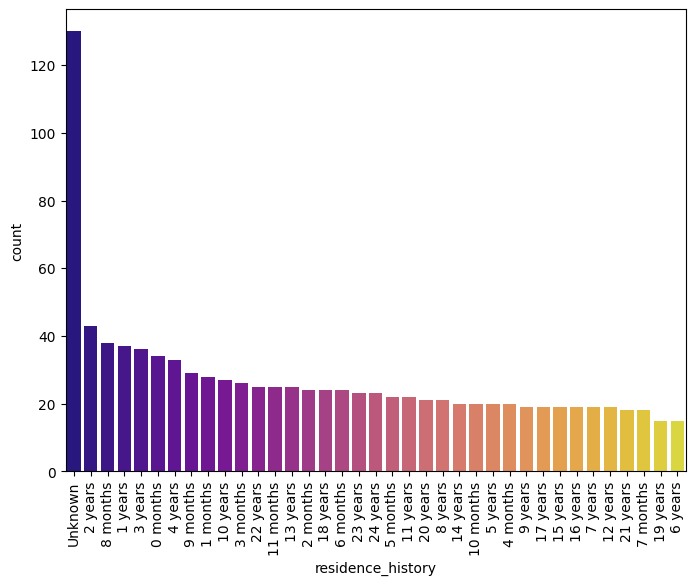

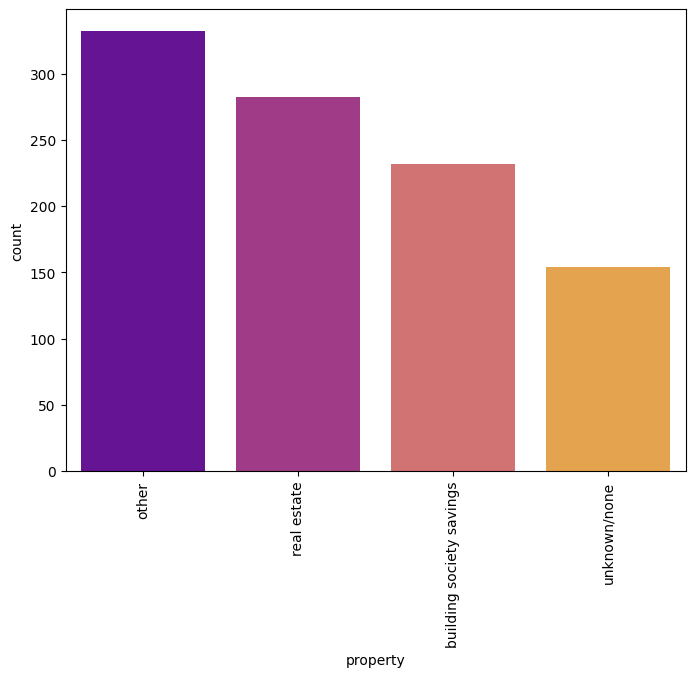

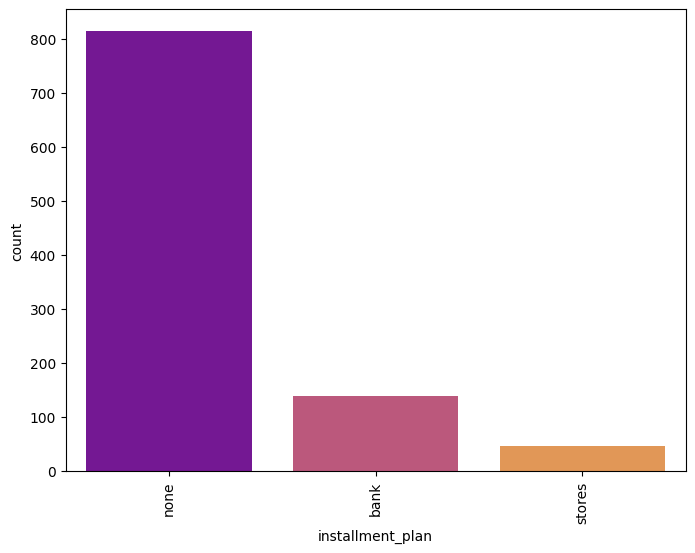

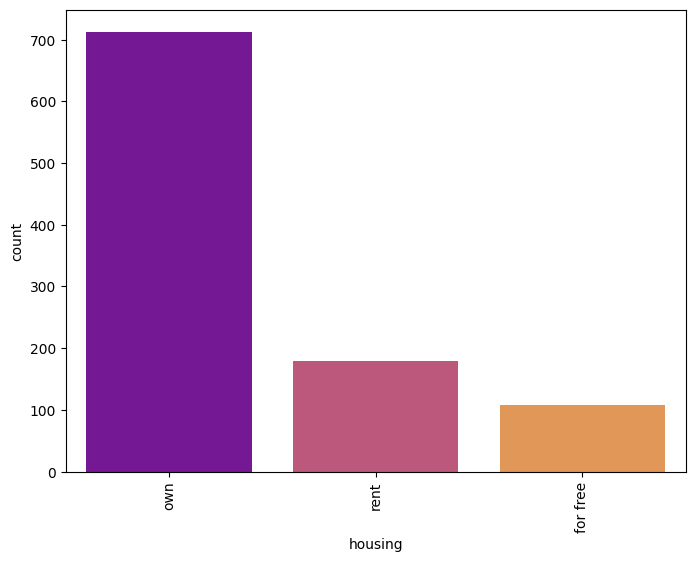

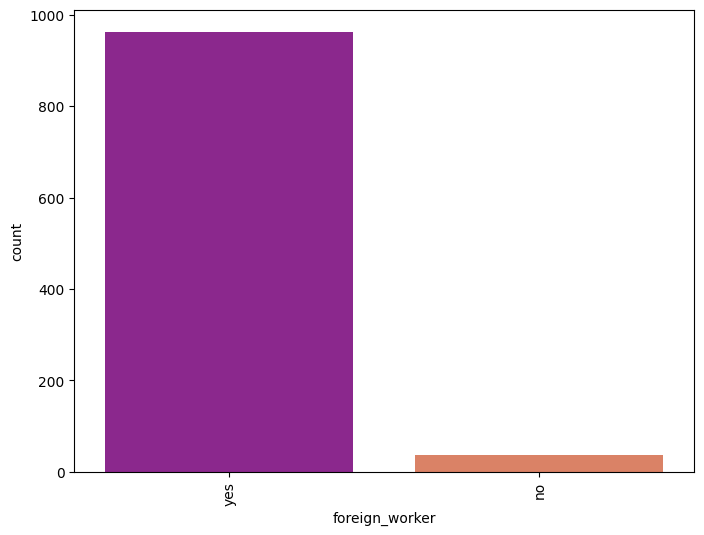

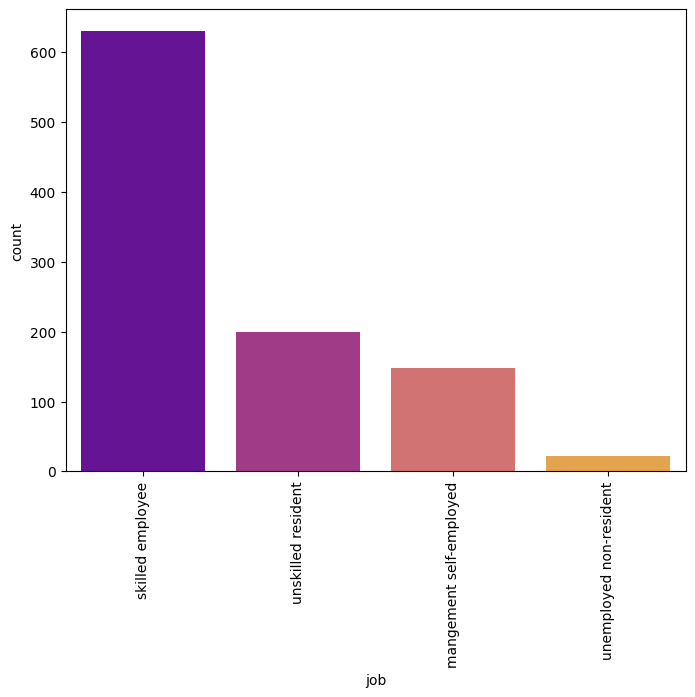

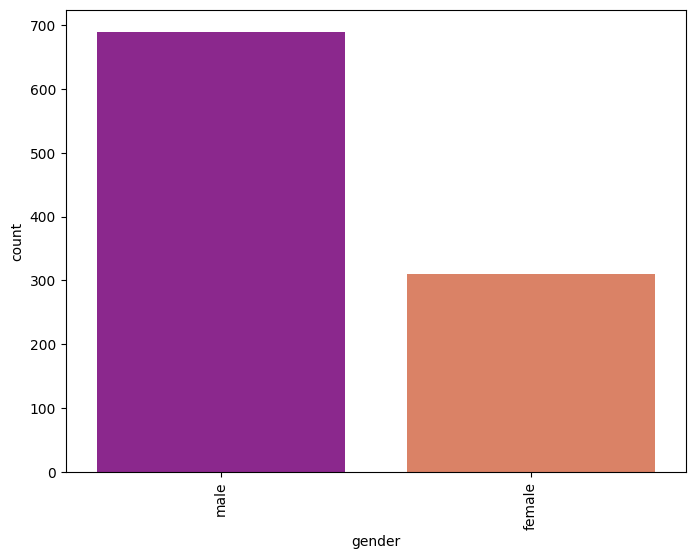

In [ ]:
# Plot countplots for the categorical variables
def drawplot(col):
    """
    This function takes in a column name of a dataframe and plots
    the count plot of the values in the column
    """
    plt.figure(figsize=(8, 6))

    # Sort categories by frequency
    sorted_categories = df[col].value_counts().index
    # plots
    sns.countplot(x=col, data=df,order=sorted_categories, palette="plasma")
    plt.xticks(rotation="vertical")

toview = ["credit_history", "purpose", "employment_length", "personal_status","other_debtors",
          "residence_history", "property", "installment_plan","housing", "foreign_worker", "job", "gender"]

# Adjust the spacing between plots
plt.subplots_adjust(hspace=0.4)

for col in toview:
    drawplot(col);

#### Interpretation:

1. Credit history: Reflects individual's past behavior with loan. Here, a significant portion of the customers have a history of repaying loans

2. Purpose: Shows different loan purposes within the dataset. The most common purpose for loans is purchasing radio or television sets. Car and furniture purchases are also relatively common.

3. Employment length:  Provides insights into the distribution of employment lengths among the loan applicants.  1 year is the most frequent category, indicating that a significant number of peeople have been employed for one year.

4. Personal Status: Most borrowers are single.

5. Other debtors: Shows if other debtors are involved in the loan application. "none" is the most frequent category, indicating that most applicants do not have other debtors involved in their loan applications

6. Residence history: Analyzes the distribution of different residence history durations among the loan applicants. unknown is the most frequent category, indicating that a significant number of borrowers have an unknown resident history.

7. Property: Gives insight into the different property types. A significant number of applicants have property types that are not explicitly known (others).

8. Installment Plans: Most of the applicants do not have other installment plans.
 People who make up the most borrowers are foreign workers, borrowers, skilled employees and more males.

#### Credit Risk Analysis
We will analyze between the Target feature (default feature) and other features to gain more insight.
1 signifies default loan, 0 good loan

1. default vs employment_length
2. default vs checking_balance
3. default vs credit history
4. default vs loan duration
5. default vs purpose
6. default vs age
7. default vs purpose
8. default vs installment rate


In [ ]:
# Overall default rate.
default_rate = (df["default"] == 1).sum() / len(df)
print(f"Overall Default Rate (defaulters): {default_rate * 100:.2f}%")


Overall Default Rate (defaulters): 30.00%


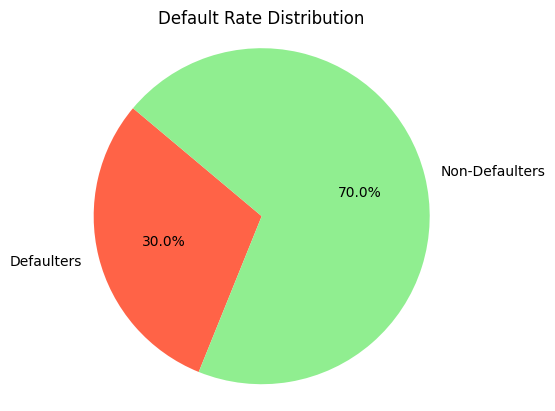

In [ ]:

# Defaulters and Non-Defaulters
defaulters = (df["default"] == 1).sum()
non_defaulters = (df["default"] == 0).sum()


labels = ["Defaulters", "Non-Defaulters"]
tips = [defaulters, non_defaulters]
colors = ["#FF6347", "#90EE90"]

plt.pie(tips, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Default Rate Distribution")
plt.axis("equal")
plt.show()

#### default vs employment_length

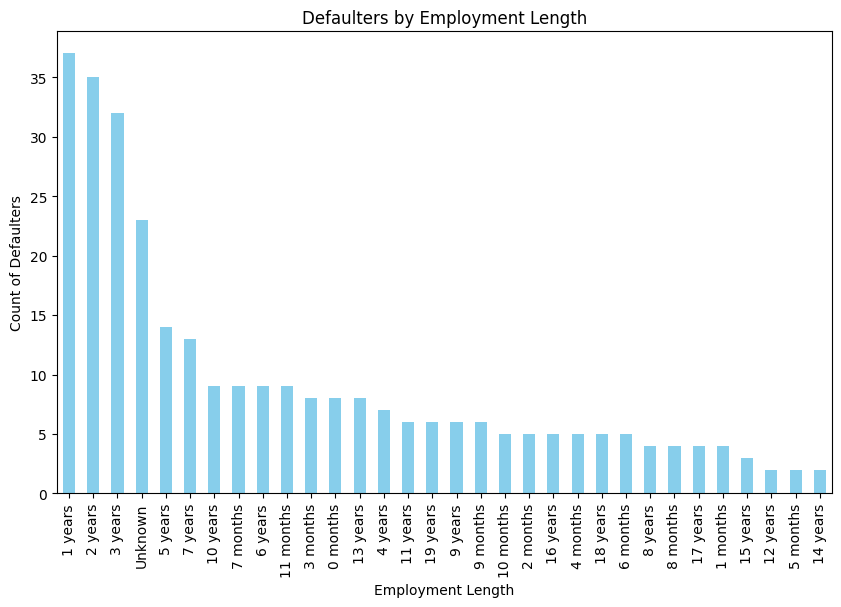

In [ ]:
# Default vs Employment Length

plt.figure(figsize=(10, 6))
employment_length_default_count = df[df["default"] == 1].groupby("employment_length")["default"].count()
employment_length_default_count_sorted = employment_length_default_count.sort_values(ascending=False)
employment_length_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Employment Length")
plt.xlabel("Employment Length")
plt.ylabel("Count of Defaulters")
plt.show()

#### default vs checking balance

No correlation between default rate and checking balance. Suggesting that borrowers with high checking balances are not necessarily less likely to default and borrowers with low checking balances are not necessarily more likely to default.

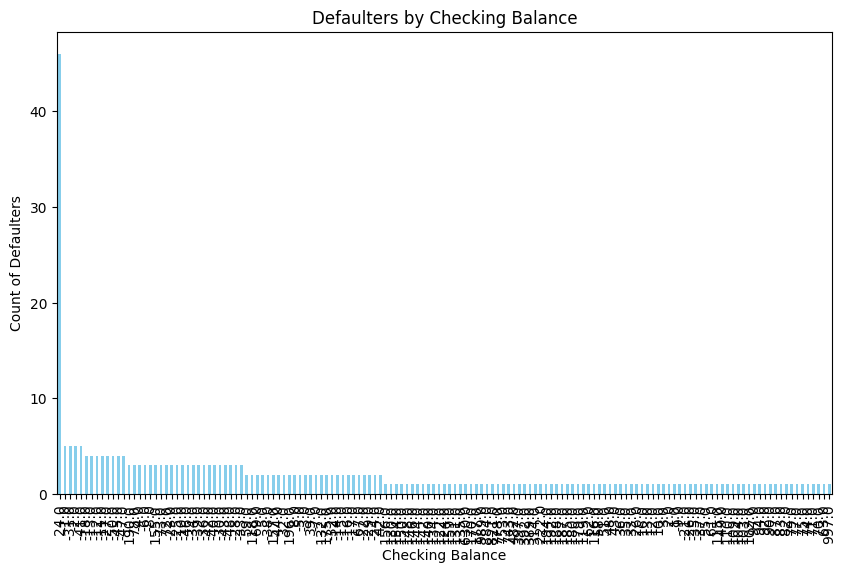

In [ ]:
# Default by Checking Balance
plt.figure(figsize=(10, 6))
checking_balance_default_count = df[df["default"] == 1].groupby("checking_balance")["default"].count()
checking_balance_default_count_sorted = checking_balance_default_count.sort_values(ascending=False)
checking_balance_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Checking Balance")
plt.xlabel("Checking Balance")
plt.ylabel("Count of Defaulters")
plt.show()

#### default vs credit history

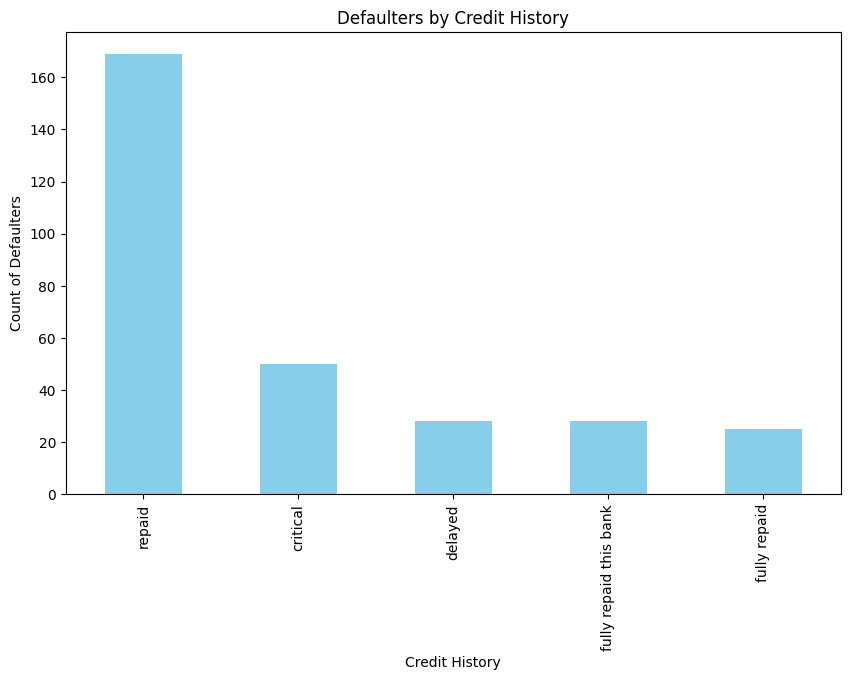

In [ ]:
# Default by Credit History
plt.figure(figsize=(10, 6))
credit_history_default_count = df[df["default"] == 1].groupby("credit_history")["default"].count()
credit_history_default_count_sorted = credit_history_default_count.sort_values(ascending=False)
credit_history_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Credit History")
plt.xlabel("Credit History")
plt.ylabel("Count of Defaulters")
plt.show()

#### default vs loan duration category

<ipython-input-158-5b4dc78c7177>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_duration_default_count = df[df["default"] == 1].groupby("loan_duration_category")["default"].count()


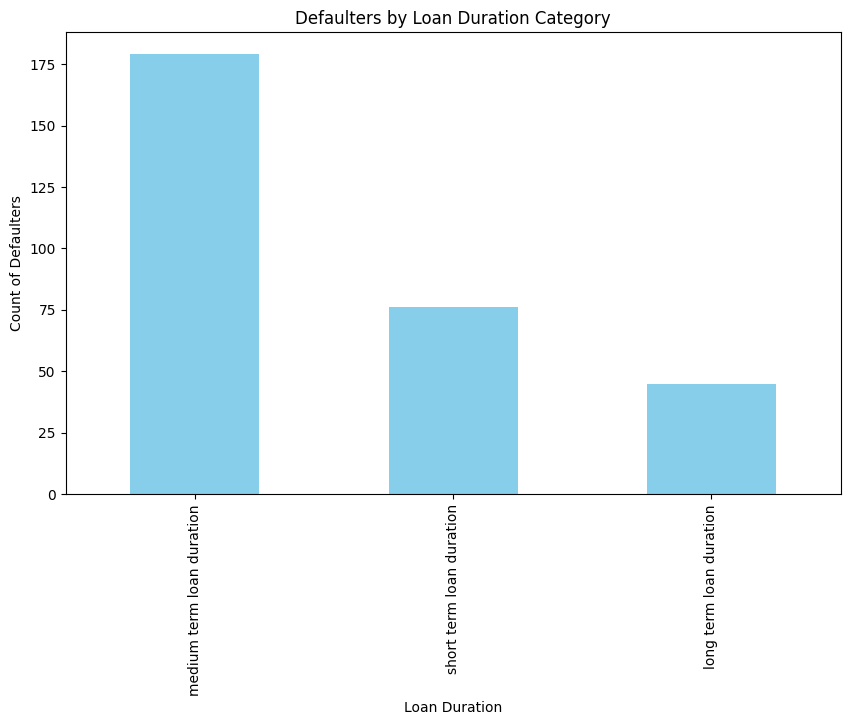

In [ ]:
# Default vs Loan Duration
plt.figure(figsize=(10, 6))
loan_duration_default_count = df[df["default"] == 1].groupby("loan_duration_category")["default"].count()
loan_duration_default_count_sorted = loan_duration_default_count.sort_values(ascending=False)
loan_duration_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Loan Duration Category")
plt.xlabel("Loan Duration")
plt.ylabel("Count of Defaulters")
plt.show()

#### default rate vs purpose

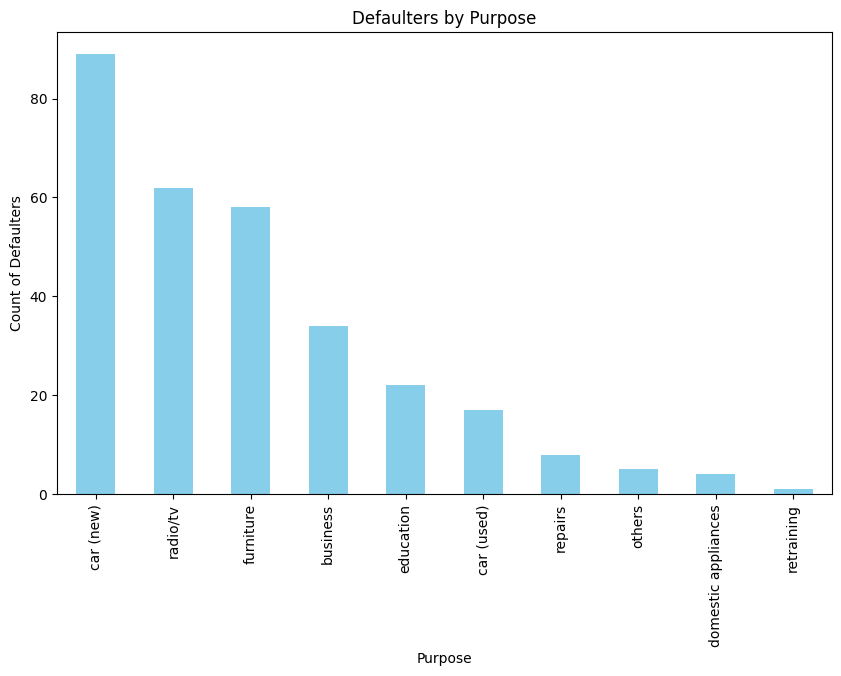

In [ ]:
# Default vs Purpose
plt.figure(figsize=(10, 6))
purpose_default_count = df[df["default"] == 1].groupby("purpose")["default"].count()
purpose_default_count_sorted = purpose_default_count.sort_values(ascending=False)
purpose_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Count of Defaulters")
plt.show()

#### default rate by savings_balance

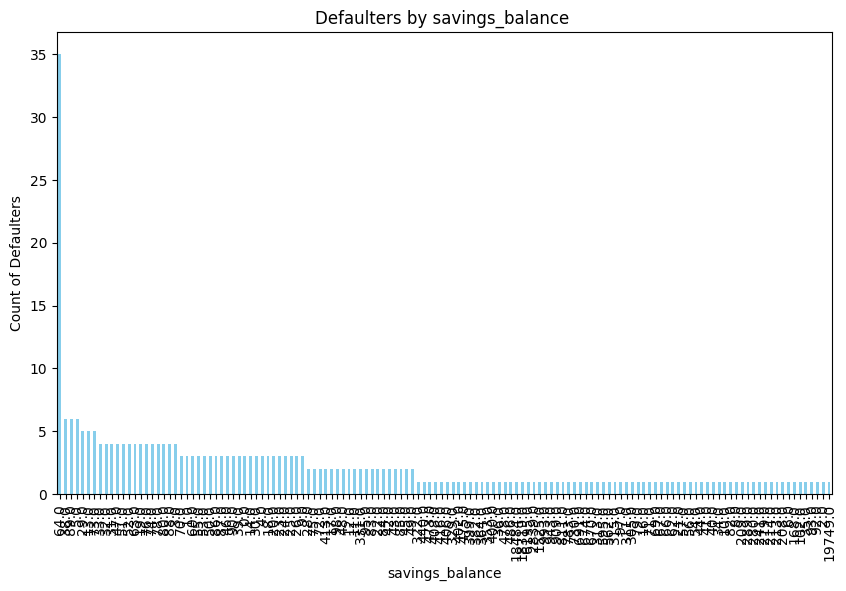

In [ ]:
# Default vs savings_balance
plt.figure(figsize=(10, 6))
savings_balance_default_count = df[df["default"] == 1].groupby("savings_balance")["default"].count()
savings_balance_default_count_sorted = savings_balance_default_count.sort_values(ascending=False)
savings_balance_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by savings_balance ")
plt.xlabel("savings_balance")
plt.ylabel("Count of Defaulters")
plt.show()

#### default rate vs job

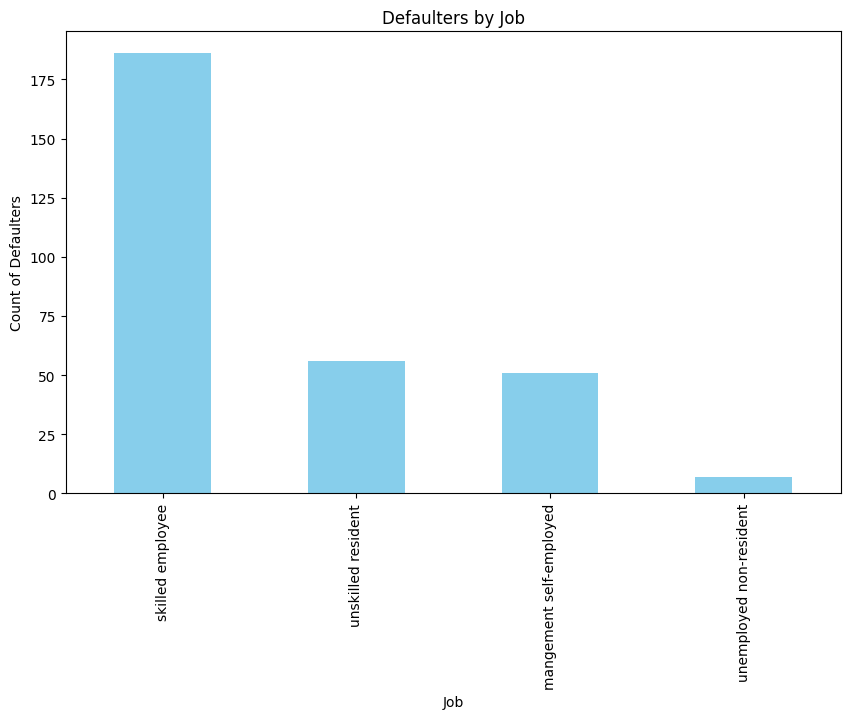

In [ ]:
# Visual view of default rate by job

plt.figure(figsize=(10, 6))
job_default_count = df[df["default"] == 1].groupby("job")["default"].count()
job_default_count_sorted = job_default_count.sort_values(ascending=False)
job_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Job")
plt.xlabel("Job")
plt.ylabel("Count of Defaulters")
plt.show()

#### default rate vs age

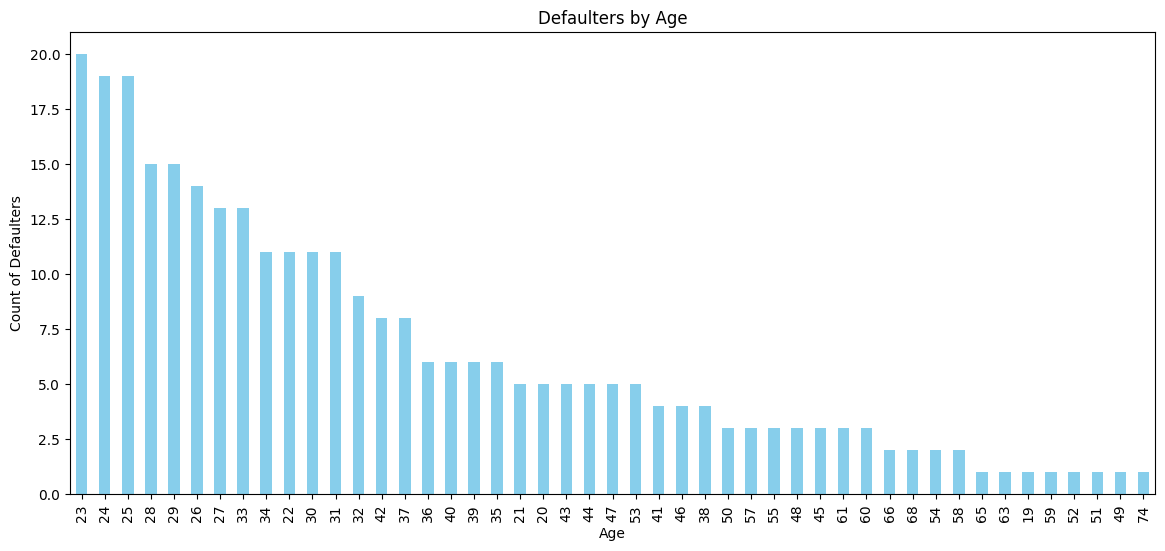

In [ ]:
# Visual view of default rate by age

plt.figure(figsize=(14, 6))
age_default_count = df[df["default"] == 1].groupby("age")["default"].count()
age_default_count_sorted = age_default_count.sort_values(ascending=False)
age_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Age")
plt.xlabel("Age")
plt.ylabel("Count of Defaulters")
plt.show()

#### Default rate by other_debtors

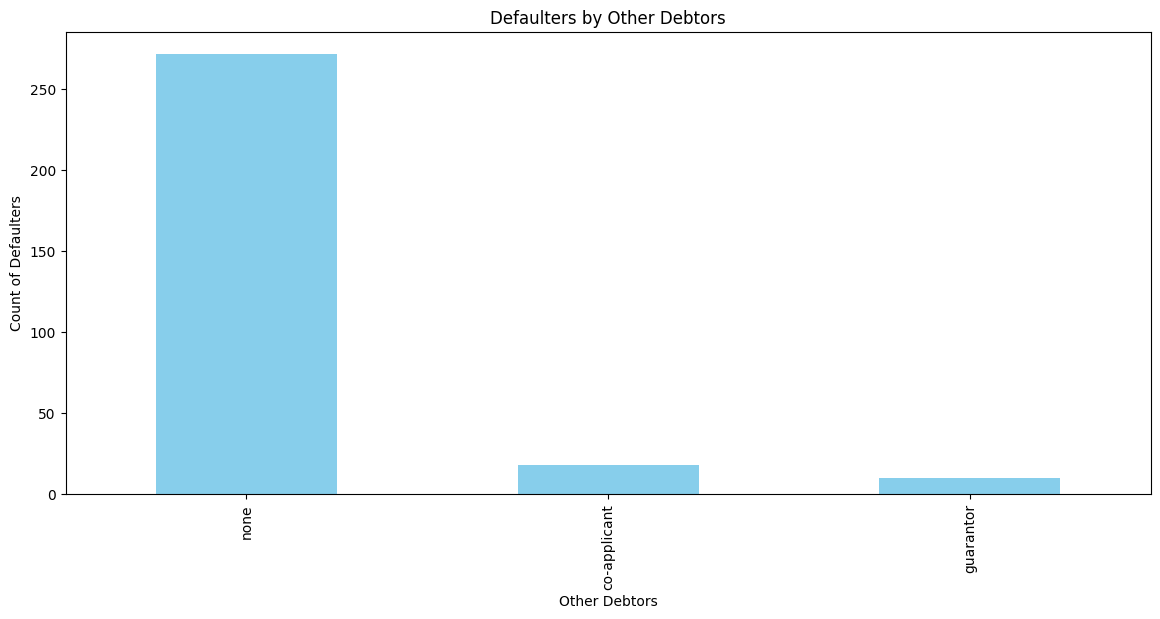

In [ ]:
# Visual view of default rate by other_debtors

plt.figure(figsize=(14, 6))
other_debtors_default_count = df[df["default"] == 1].groupby("other_debtors")["default"].count()
other_debtors_default_count_sorted = other_debtors_default_count.sort_values(ascending=False)
other_debtors_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Other Debtors")
plt.xlabel("Other Debtors")
plt.ylabel("Count of Defaulters")
plt.show()

#### Default rate by gender

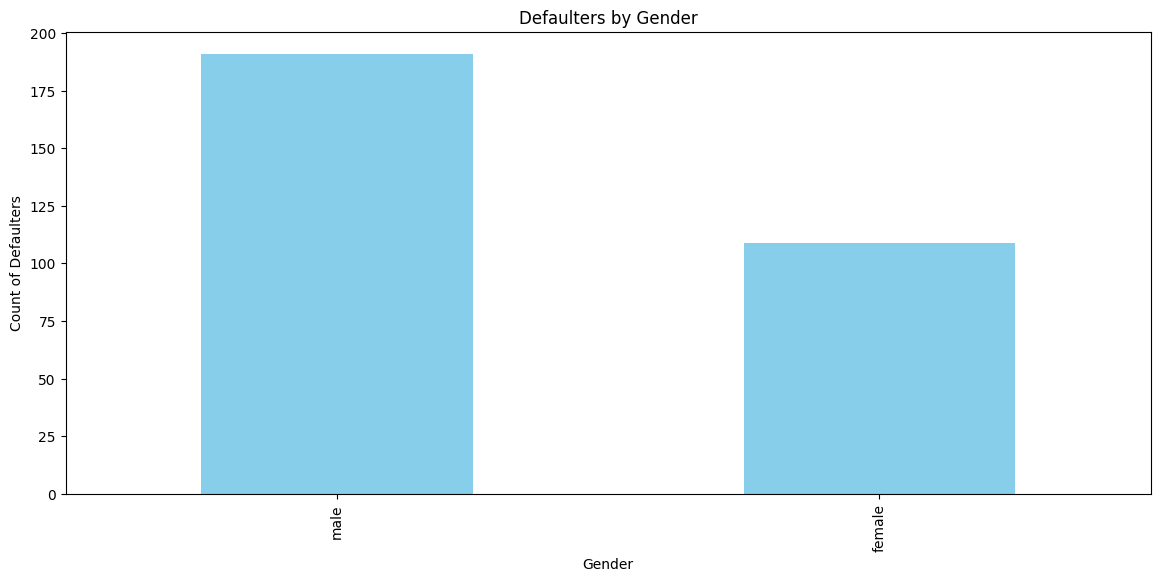

In [ ]:
# Default vs Gender
plt.figure(figsize=(14, 6))
gender_default_count = df[df["default"] == 1].groupby("gender")["default"].count()
gender_default_count_sorted = gender_default_count.sort_values(ascending=False)
gender_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Defaulters")
plt.show()

#### Default rate by personal status

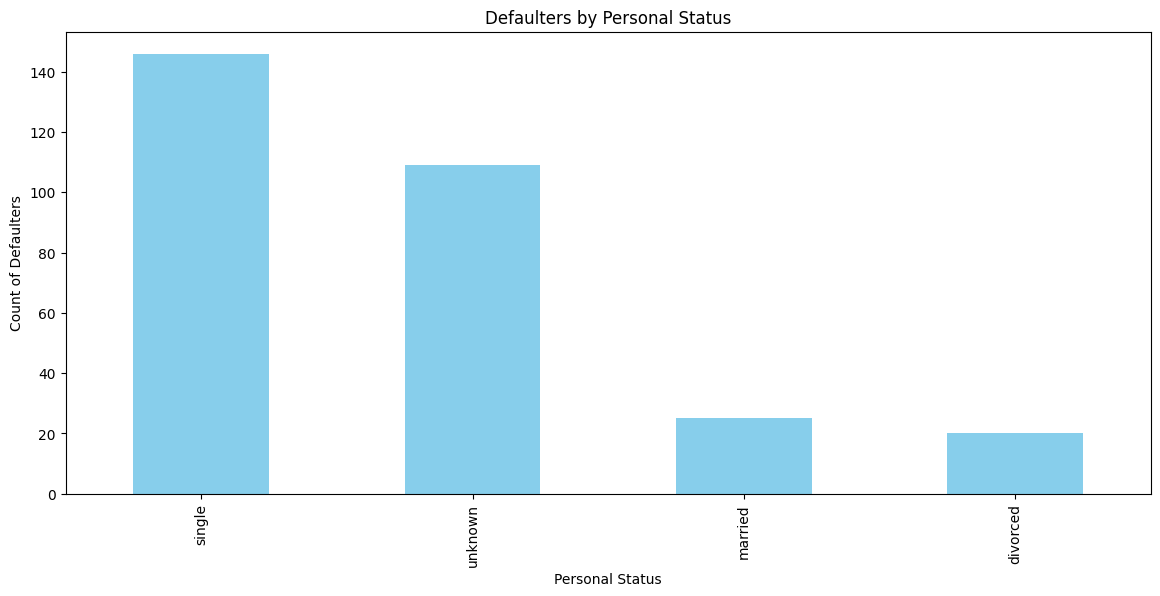

In [ ]:
# Default vs Personal Status
plt.figure(figsize=(14, 6))
personal_status_default_count = df[df["default"] == 1].groupby("personal_status")["default"].count()
personal_status_default_count_sorted = personal_status_default_count.sort_values(ascending=False)
personal_status_default_count_sorted.plot(kind="bar", color="skyblue")
plt.title("Defaulters by Personal Status")
plt.xlabel("Personal Status")
plt.ylabel("Count of Defaulters")
plt.show()


### Default Analysis by Gender

### Female Defaulters by:
- Personal Status
- Age
- Job
- Other debtors
- Purpose

#### Female defaulters by personal status

<ipython-input-103-63f36198cb90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_defaulters, x="personal_status", palette="viridis", order=female_defaulters["personal_status"].value_counts().index)


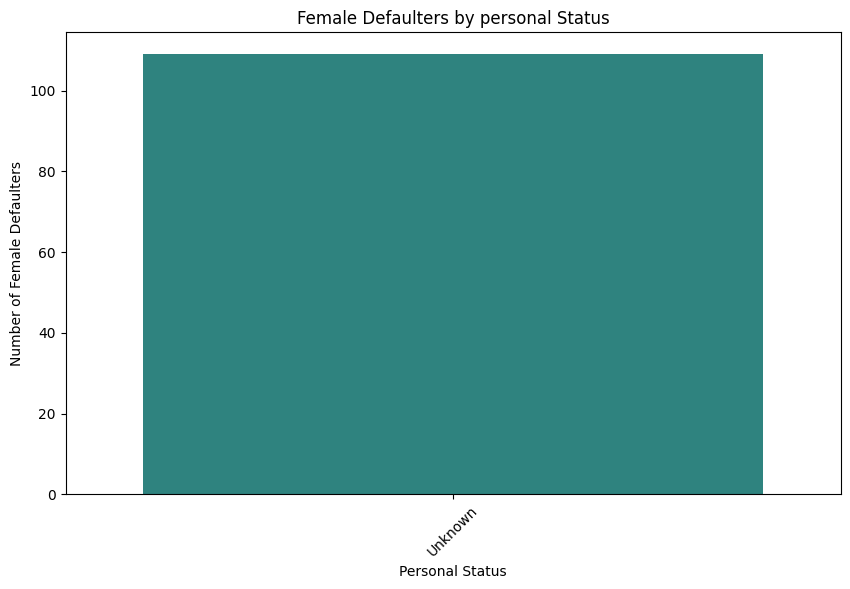

In [ ]:
female_defaulters = df[(df["gender"] == "female") & (df["default"] == 1)]

# Plot the count of female defaulters by personal status
plt.figure(figsize=(10, 6))
sns.countplot(data=female_defaulters, x="personal_status", palette="viridis", order=female_defaulters["personal_status"].value_counts().index)
plt.title("Female Defaulters by personal Status")
plt.xlabel("Personal Status")
plt.ylabel("Number of Female Defaulters")
plt.xticks(rotation=45)
plt.show()


#### Female defaulters by Age

<ipython-input-104-6ace19a16f2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=female_age_defaulters, x="age", palette="viridis", order=female_age_defaulters["age"].value_counts().index)


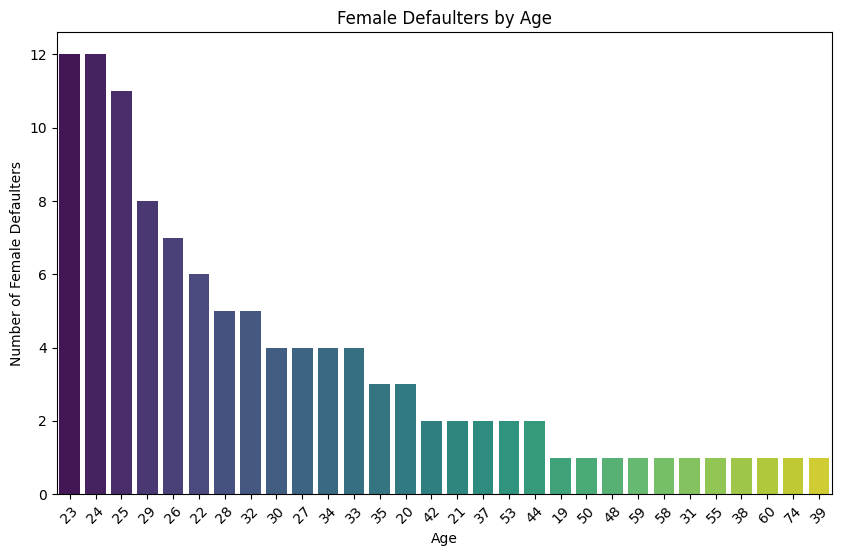

In [ ]:
female_age_defaulters = df[(df["gender"] == "female") & (df["default"] == 1)]

# Plot the count of female defaulters by age
plt.figure(figsize=(10, 6))
sns.countplot(data=female_age_defaulters, x="age", palette="viridis", order=female_age_defaulters["age"].value_counts().index)
plt.title("Female Defaulters by Age")
plt.xlabel("Age")
plt.ylabel("Number of Female Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Female defaulters by job

<ipython-input-105-fc034e339990>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=job_female_defaulters, x="job", palette="viridis",order = job_female_defaulters["job"].value_counts().index)


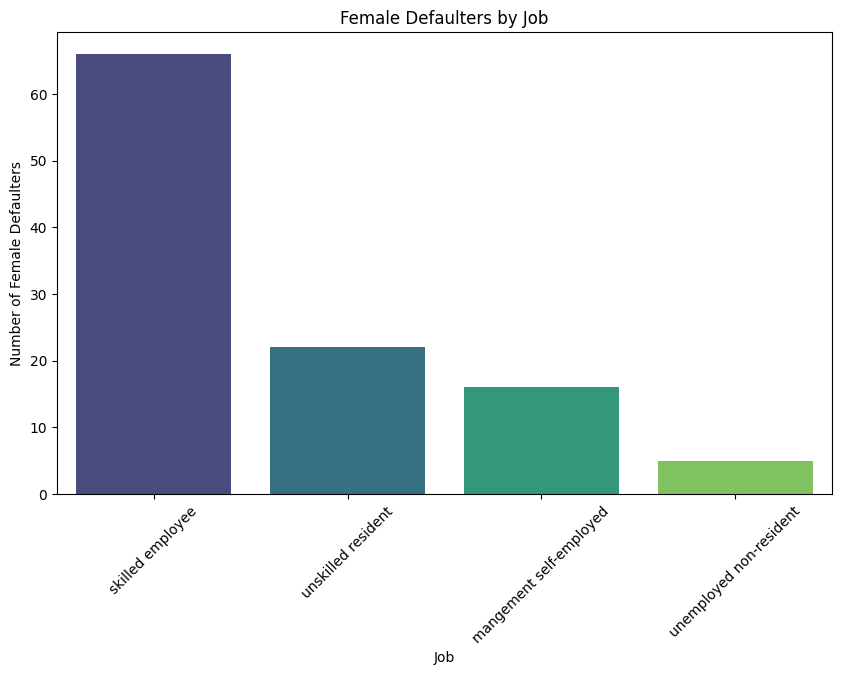

In [ ]:
job_female_defaulters = df[(df["gender"] == "female") & (df["default"] == 1)]

# Plot the count of female defaulters by job
plt.figure(figsize=(10, 6))
sns.countplot(data=job_female_defaulters, x="job", palette="viridis",order = job_female_defaulters["job"].value_counts().index)
plt.title("Female Defaulters by Job")
plt.xlabel("Job")
plt.ylabel("Number of Female Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Female defaulters by other debtors

<ipython-input-106-ad58b70dee2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=other_debtors_female_defaulters, x="other_debtors", palette="viridis",order = other_debtors_female_defaulters["other_debtors"].value_counts().index)


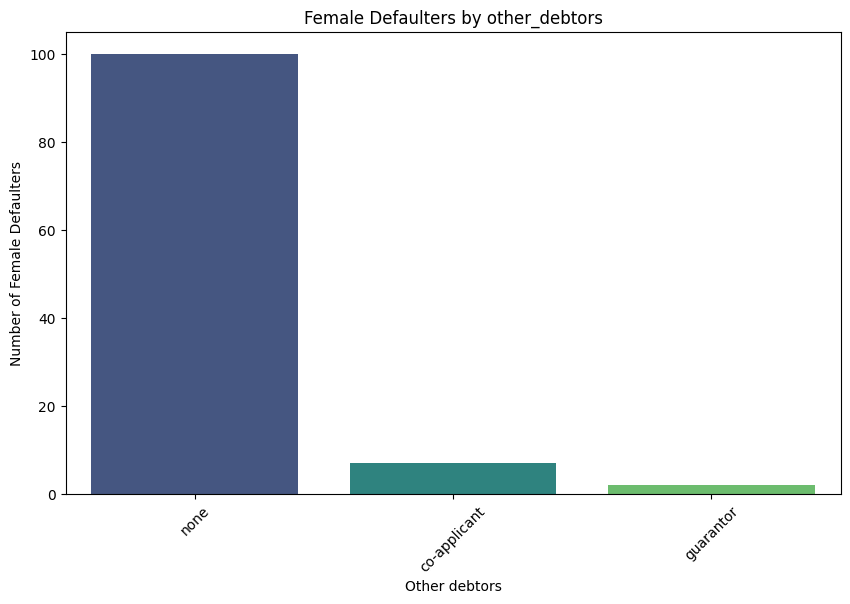

In [ ]:
other_debtors_female_defaulters = df[(df["gender"] == "female") & (df["default"] == 1)]

# Plot the count of female defaulters by other debtors
plt.figure(figsize=(10, 6))
sns.countplot(data=other_debtors_female_defaulters, x="other_debtors", palette="viridis",order = other_debtors_female_defaulters["other_debtors"].value_counts().index)
plt.title("Female Defaulters by other_debtors")
plt.xlabel("Other debtors")
plt.ylabel("Number of Female Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Female defaulters by purpose

<ipython-input-107-605717496cbe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=purpose_female_defaulters, x="purpose", palette="viridis",order = purpose_female_defaulters["purpose"].value_counts().index)


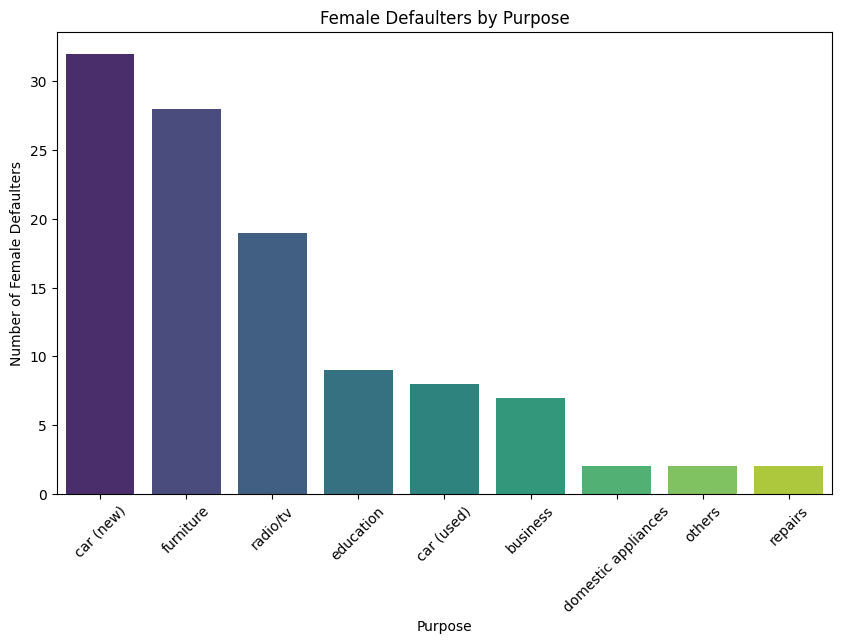

In [ ]:
purpose_female_defaulters = df[(df["gender"] == "female") & (df["default"] == 1)]

# Plot the count of female defaulters by purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=purpose_female_defaulters, x="purpose", palette="viridis",order = purpose_female_defaulters["purpose"].value_counts().index)
plt.title("Female Defaulters by Purpose")
plt.xlabel("Purpose")
plt.ylabel("Number of Female Defaulters")
plt.xticks(rotation=45)
plt.show()

### Male Defaulters by:
- Personal Status
- Age
- Job
- Other debtors
- Purpose

#### Male defaulters by personal status

<ipython-input-108-ebf603a5860d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_defaulters, x="personal_status", palette="viridis", order=male_defaulters["personal_status"].value_counts().index)


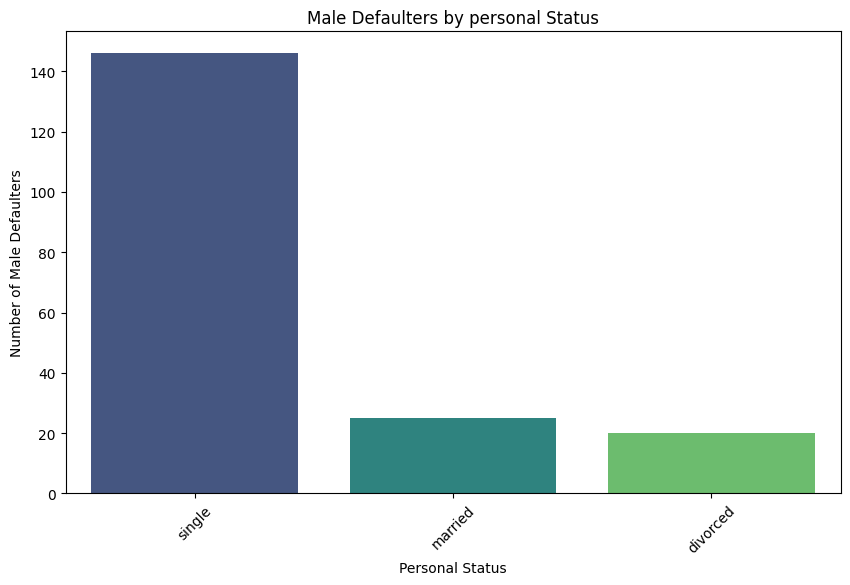

In [ ]:
male_defaulters = df[(df["gender"] == "male") & (df["default"] == 1)]

# Plot the count of male defaulters by personal status
plt.figure(figsize=(10, 6))
sns.countplot(data=male_defaulters, x="personal_status", palette="viridis", order=male_defaulters["personal_status"].value_counts().index)
plt.title("Male Defaulters by personal Status")
plt.xlabel("Personal Status")
plt.ylabel("Number of Male Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Male defaulters by Age

<ipython-input-109-ba44a80f68f3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=male_age_defaulters, x="age", palette="viridis", order=male_age_defaulters["age"].value_counts().index)


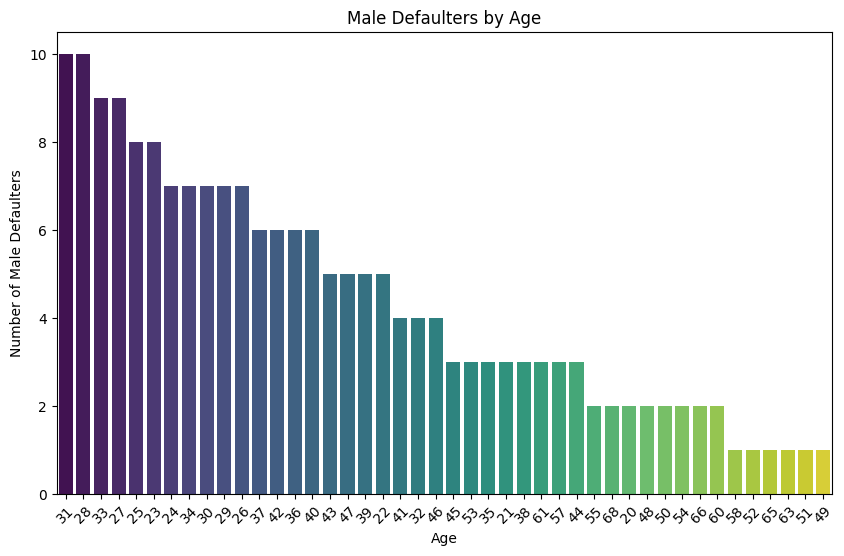

In [ ]:
male_age_defaulters = df[(df["gender"] == "male") & (df["default"] == 1)]

# Plot the count of male defaulters by age
plt.figure(figsize=(10, 6))
sns.countplot(data=male_age_defaulters, x="age", palette="viridis", order=male_age_defaulters["age"].value_counts().index)
plt.title("Male Defaulters by Age")
plt.xlabel("Age")
plt.ylabel("Number of Male Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Male defaulters by Job

<ipython-input-110-311f84bd5dc0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=job_male_defaulters, x="job", palette="viridis",order = job_male_defaulters["job"].value_counts().index)


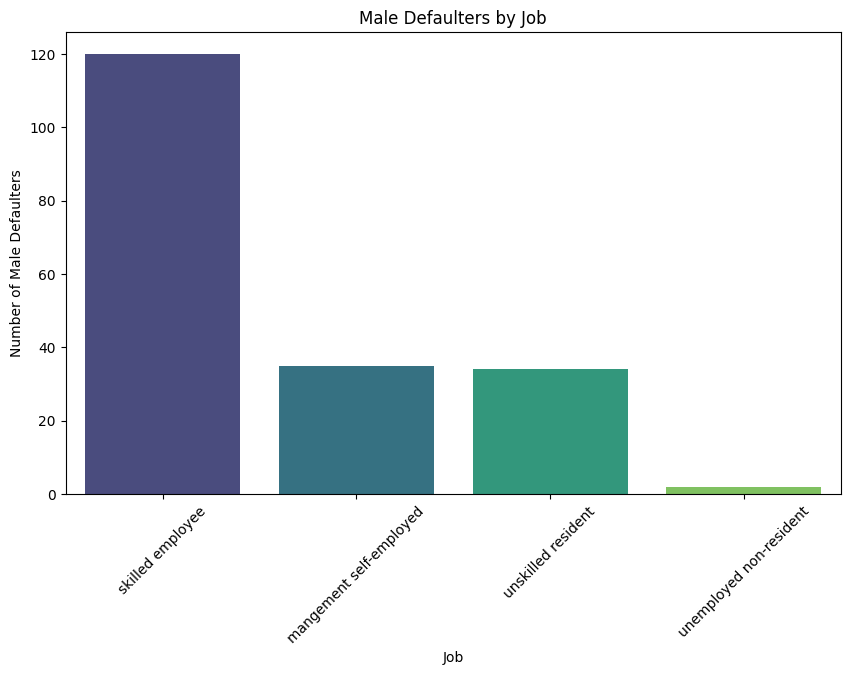

In [ ]:
job_male_defaulters = df[(df["gender"] == "male") & (df["default"] == 1)]

# Plot the count of male defaulters by job
plt.figure(figsize=(10, 6))
sns.countplot(data=job_male_defaulters, x="job", palette="viridis",order = job_male_defaulters["job"].value_counts().index)
plt.title("Male Defaulters by Job")
plt.xlabel("Job")
plt.ylabel("Number of Male Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Male defaulters by other debtors

<ipython-input-161-b651315ff1ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=other_debtors_male_defaulters, x="other_debtors", palette="viridis",order = other_debtors_male_defaulters["other_debtors"].value_counts().index)


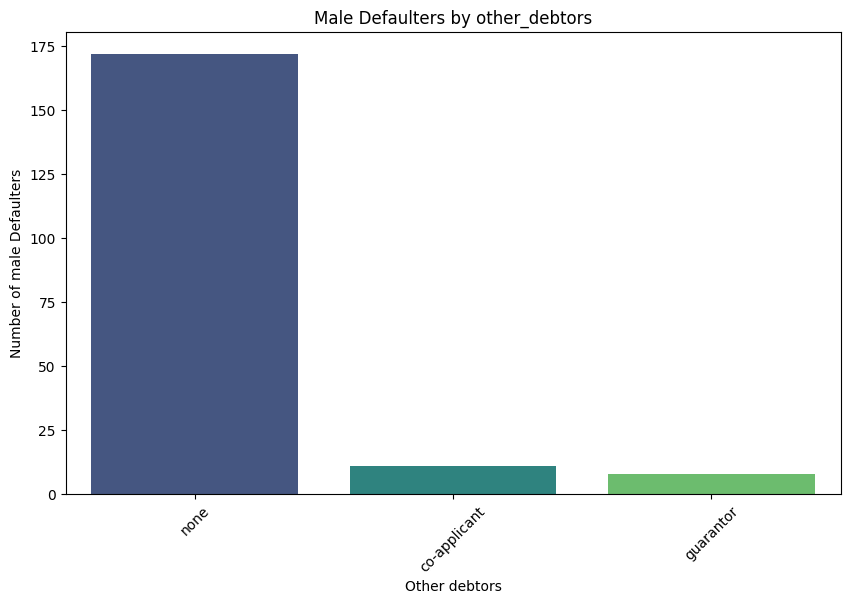

In [ ]:
other_debtors_male_defaulters = df[(df["gender"] == "male") & (df["default"] == 1)]

# Plot the count of male defaulters by other debtors
plt.figure(figsize=(10, 6))
sns.countplot(data=other_debtors_male_defaulters, x="other_debtors", palette="viridis",order = other_debtors_male_defaulters["other_debtors"].value_counts().index)
plt.title("Male Defaulters by other_debtors")
plt.xlabel("Other debtors")
plt.ylabel("Number of male Defaulters")
plt.xticks(rotation=45)
plt.show()

#### Male defaulters by purpose

<ipython-input-112-2df83c813842>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=purpose_male_defaulters, x="purpose", palette="viridis",order = purpose_male_defaulters["purpose"].value_counts().index)


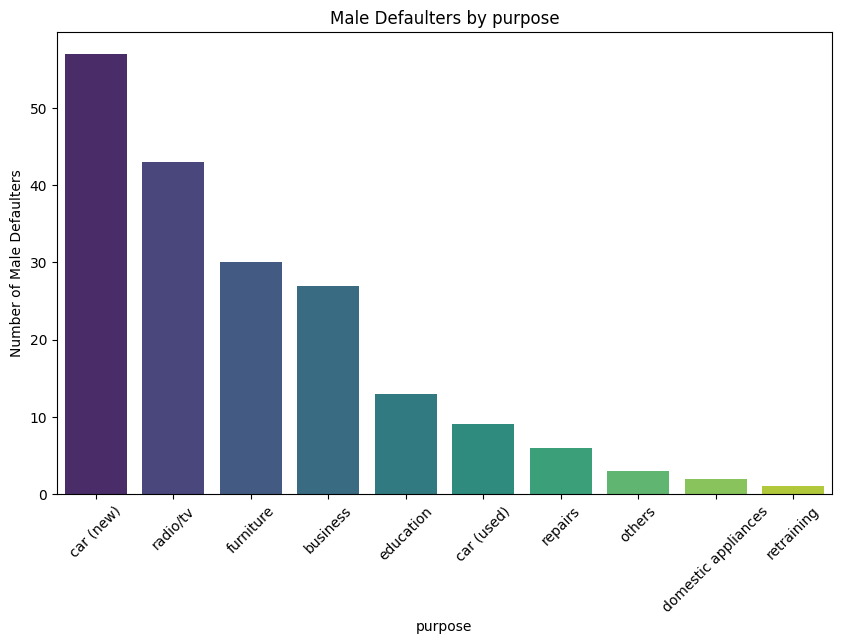

In [ ]:
purpose_male_defaulters = df[(df["gender"] == "male") & (df["default"] == 1)]

# Plot the count of male defaulters by purpose
plt.figure(figsize=(10, 6))
sns.countplot(data=purpose_male_defaulters, x="purpose", palette="viridis",order = purpose_male_defaulters["purpose"].value_counts().index)
plt.title("Male Defaulters by purpose")
plt.xlabel("purpose")
plt.ylabel("Number of Male Defaulters")
plt.xticks(rotation=45)
plt.show()

### Predictive Anaysis
- Building a basic logistic regression model to identify the most significant predictors of default rates.

#### Logistic Regression Model

In [ ]:
# 0 = good loan, 1 = default/not good loan
not_good_loan = df[df["default"]==1]
good_loan = df[df["default"]==0]


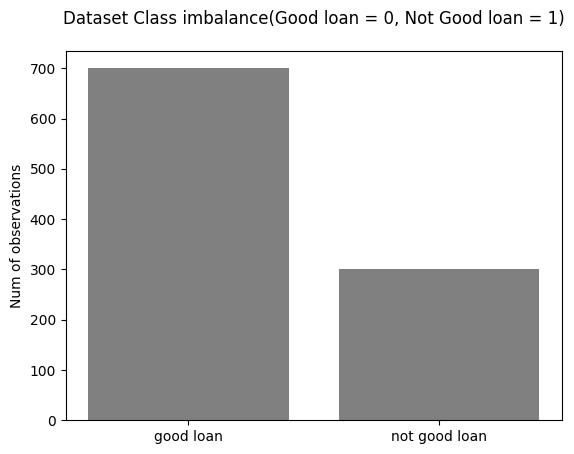

In [ ]:
# Get all possible labels
labels = df["default"].unique()
heights = [len(good_loan),len(not_good_loan)]
plt.bar(labels,heights,color='gray')
plt.title("Dataset Class imbalance(Good loan = 0, Not Good loan = 1)", y = 1.05)
plt.xticks(labels,["good loan","not good loan"])
plt.ylabel("Num of observations")
plt.show()

The target feature is unevenly distributed, with a significant disparity in the number of instances across different default feature. To tackle this imbalance, various strategies can be applied, including resampling, class weighting, or generating synthetic data. In this particular study, We will utilize the Class Weighing technique to address the imbalance and ensure more accurate model performance.

#### Preprocessing

In [ ]:
# labels
y = df["default"]

# Features
features = df.drop(columns=["default", "telephone", "Observation_id", "loan_duration_category"])

# Apply one-hot encoding to the features
X = pd.get_dummies(features, drop_first=True)

In [ ]:
# Split the data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Instantiate the StandardScaler for scaling purposes
scaler = StandardScaler()

# Fit the scaler on the training set and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Create an instance of the LogisticRegression model
model_reg = LogisticRegression(class_weight="balanced")

# Fit the model
model_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# coefficients for the model
coefficients = model_reg.coef_[0]
feature_names = X.columns

# feature names and coefficients
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Filter to keep only positive coefficients and sort by Coefficient in descending order
positive_coef_df = coef_df[coef_df["Coefficient"] > 0].sort_values(by="Coefficient", ascending=False)

# Display
print("Features Increasing Likelihood of Default:")
print(positive_coef_df)


Features Increasing Likelihood of Default:
                                   Feature  Coefficient
11                   credit_history_repaid     0.516757
12                       purpose_car (new)     0.464617
9              credit_history_fully repaid     0.447169
1                     months_loan_duration     0.412022
10   credit_history_fully repaid this bank     0.406830
4                         installment_rate     0.351269
100                     foreign_worker_yes     0.283839
15                       purpose_education     0.277706
2                                   amount     0.276318
6                         existing_credits     0.215657
25             employment_length_11 months     0.213957
52                personal_status_divorced     0.193010
8                   credit_history_delayed     0.127266
14             purpose_domestic appliances     0.106837
53                 personal_status_married     0.097968
19                         purpose_repairs     0.088517
7    

As seen above, features credit_history_repaid, purpose_car (new), credit_history_fully repaid, are associated with a higher likelihood of default.

#### Model Testing
The AUC-ROC metric evaluates how well the model is capable of distinguishing between defaukts i.e true positives (bad loan correctly identified) and false positives (good loan misclassified as defaulters).

In [ ]:
def roc_score(model_reg, X_test, y_test):
    """ Calculates the AUC-ROC of the model

    Parameters:
    - model_reg: a trained classification model
    - X_test: the testing data features
    - y_test: the testing data target (true labels)

    Returns:
    - The ROC-AUC score as a floating-point number.
    """
    # Predict probabilities of positive class
    y_pred_prob = model_reg.predict_proba(X_test)[:, 1]
    # Calculate ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    return float(roc_auc)

In [ ]:
print(roc_score(model_reg,X_test,y_test))

0.509015506671475


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The low ROC-AUC score of 0.509 suggests that the model is barely better than random guessing. An ROC-AUC score of 0.8 or higher is ideal for good discrimination between defaulters and non-defaulters

Checking other metrics such as accuracy, precision, recall, and F1 score to get a comprehensive understanding of the model's performance.

In [ ]:
def scores(model_reg, X_test, y_test):
    """ Calculates the Accuracy, Precision, Recall and F1 scores.

    Parameter:
    - model_reg : Fitted classification model
    - X_test: A numpy array containing the splitted X_test feature
    - y_test: A numpy array containing the splitted y_test feature

    Returns:
    - A tuple in the form (Accuracy, Precision, Recall, F1-Score)
    """
    y_pred = model_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")

    return (accuracy, precision, recall, f1)


In [ ]:
# Evaluate the model
roc_auc = roc_score(model_reg, X_test_scaled, y_test)
(accuracy, precision, recall, f1) = scores(model_reg, X_test_scaled, y_test)

# Print evaluation metrics
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 score: %f' % f1)


Accuracy: 0.605000
Precision: 0.368421
Recall: 0.474576
F1 score: 0.617201


- Correctly classifies about 60.5% of all cases, meaning it identifies most defaults and non-defaults accurately.
- Low precision (36.8%) suggests that there are quite a few False Positives, where non-defaults are incorrectly classified as defaults.
- Captures about 47.5% of actual default cases, meaning almost half of true defaults are detected.
- The F1 score of 61.7% indicates a moderate balance between precision and recall, but with room for improvement in identifying actual default cases accurately.

In summary:
Implementing feature engineering (Transform skewed features), handling class imbalance (upsampling or downsampling the majority class), hyperparameter tuning (Using grid search or randomized search with cross-validation), and exploring more sophisticated models like Random Forests or Gradient Boosting can improve the model's accuracy and robustness in predicting defaults.